In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import seaborn as sns
from statsmodels.formula.api import glm
import statsmodels.api as sm

### Filtering

For human:  all_genes == All_genes_human.csv (see data folder)

For Mus musculus: all_genes == All_genes.csv

In [ ]:
# Load
all_genes = pd.read_csv('All_genes_human.csv')
counts = pd.read_csv('./embryo_counts_human.csv', index_col=0)
meta = pd.read_csv('embryo_meta_human.csv', index_col=0)

In [ ]:
import pandas as pd
import numpy as np

# Your DataFrame (in counts format)
counts = counts.replace(0, 1e-6)  # Replace zeroes with 1e-6 (needed for LRT)

In [ ]:
meta

day          ct        experiment technology  \
index                                                                  
ERX3015937_ERX3015937  5.00     Unknown  Meistermann_2021  SMARTSeq2   
ERX3015939_ERX3015939  5.00     Unknown  Meistermann_2021  SMARTSeq2   
ERX3015940_ERX3015940  5.00     Unknown  Meistermann_2021  SMARTSeq2   
ERX3015941_ERX3015941  5.00     Unknown  Meistermann_2021  SMARTSeq2   
ERX3015936_ERX3015936  5.00     Unknown  Meistermann_2021  SMARTSeq2   
...                     ...         ...               ...        ...   
SRX300884_SRX300884    2.00          4C          Xue_2013   Tang2009   
SRX300876_SRX300876    0.33  Pronucleus          Xue_2013   Tang2009   
SRX300882_SRX300882    1.25          2C          Xue_2013   Tang2009   
SRX300886_SRX300886    2.00          4C          Xue_2013   Tang2009   
SRX300877_SRX300877    0.33  Pronucleus          Xue_2013   Tang2009   

                         n_counts  n_genes     ct_fine   timepoint  
index                                                               
ERX3015937_ERX3015937    708313.0     5761     Unknown        E5.0  
ERX3015939_ERX3015939    402557.0     5689     Unknown        E5.0  
ERX3015940_ERX3015940    511338.0     6039     Unknown        E5.0  
ERX3015941_ERX3015941    994383.0     8383     Unknown        E5.0  
ERX3015936_ERX3015936   1389486.0     7762     Unknown        E5.0  
...                           ...      ...         ...         ...  
SRX300884_SRX300884    13308292.0    14096  Prelineage          4C  
SRX300876_SRX300876    16438437.0    16542  Prelineage  Pronucleus  
SRX300882_SRX300882    11549318.0    12071  Prelineage          2C  
SRX300886_SRX300886    10497600.0     7149  Prelineage          4C  
SRX300877_SRX300877    13025184.0    17779  Prelineage  Pronucleus  

[2323 rows x 8 columns]

In [ ]:
counts

ERX3015937_ERX3015937  ERX3015939_ERX3015939  \
ENSG00000279928               0.000001               0.000001   
ENSG00000228037               0.000001               0.000001   
ENSG00000142611               0.000001               0.000001   
ENSG00000284616               0.000001               0.000001   
ENSG00000157911               0.000001               0.221872   
...                                ...                    ...   
ENSG00000271254               0.000001               0.000001   
ENSG00000275987               0.000001               0.000001   
ENSG00000268674               0.000001               0.000001   
ENSG00000277475               0.000001               0.000001   
ENSG00000275405               0.000001               0.000001   

                 ERX3015940_ERX3015940  ERX3015941_ERX3015941  \
ENSG00000279928               0.000001               0.000001   
ENSG00000228037               0.000001               0.000001   
ENSG00000142611               0.000001               0.000001   
ENSG00000284616               0.000001               0.000001   
ENSG00000157911               0.000001               0.000001   
...                                ...                    ...   
ENSG00000271254               0.000001               0.000001   
ENSG00000275987               0.000001               0.000001   
ENSG00000268674               0.000001               0.000001   
ENSG00000277475               0.000001               0.000001   
ENSG00000275405               0.000001               0.000001   

                 ERX3015936_ERX3015936  ERX3015943_ERX3015943  \
ENSG00000279928               0.000001               0.000001   
ENSG00000228037               0.000001               0.000001   
ENSG00000142611               0.000001               0.000001   
ENSG00000284616               0.000001               0.000001   
ENSG00000157911               0.302064               0.000001   
...                                ...                    ...   
ENSG00000271254               0.007171               0.000001   
ENSG00000275987               0.000001               0.000001   
ENSG00000268674               0.000001               0.000001   
ENSG00000277475               0.000001               0.000001   
ENSG00000275405               0.000001               0.000001   

                 ERX3015935_ERX3015935  ERX3015945_ERX3015945  \
ENSG00000279928               0.000001               0.000001   
ENSG00000228037               0.000001               0.000001   
ENSG00000142611               0.000001               0.000001   
ENSG00000284616               0.000001               0.000001   
ENSG00000157911               0.000001               0.227345   
...                                ...                    ...   
ENSG00000271254               0.000001               0.000001   
ENSG00000275987               0.000001               0.000001   
ENSG00000268674               0.000001               0.000001   
ENSG00000277475               0.000001               0.000001   
ENSG00000275405               0.000001               0.000001   

                 ERX3015938_ERX3015938  ERX3015947_ERX3015947  ...  \
ENSG00000279928               0.000001               0.000001  ...   
ENSG00000228037               0.000001               0.000001  ...   
ENSG00000142611               0.000001               0.000001  ...   
ENSG00000284616               0.000001               0.000001  ...   
ENSG00000157911               0.000001               0.000001  ...   
...                                ...                    ...  ...   
ENSG00000271254               0.000001               0.000001  ...   
ENSG00000275987               0.000001               0.000001  ...   
ENSG00000268674               0.000001               0.000001  ...   
ENSG00000277475               0.000001               0.000001  ...   
ENSG00000275405               0.000001               0.000001  ...   

                 SRX300887_SRX300887  SRX300880_SRX3

For human filtered_counts = counts[counts.index.isin(all_genes["ENSEMBL"])]

In [ ]:
# Keep only genes of interest
#counts = counts.set_index("...1") #check your counts (gene names should be an index, if all's okay - this line is not needed)
filtered_counts = counts[counts.index.isin(all_genes["ENSEMBL"])]
filtered_counts.shape

(3726, 2323)

In [ ]:
meta['day'] = pd.Categorical(meta['day'])

In [ ]:
meta['day'].dtype

CategoricalDtype(categories=[0.0, 0.33, 0.75, 1.25, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                  9.0, 10.0],
, ordered=False, categories_dtype=float64)

### LRT

In [ ]:
from statsmodels.stats import multitest


full_model should include time factor (days, in our case)

And reduced_model - shouldn't

In [ ]:
counts_t = filtered_counts.T
counts_t = counts_t.loc[meta.index]

lrt_results = []

for gene in counts_t.columns:
    y = counts_t[gene]
    meta["y"] = y
    if (y == 0).all() or y.nunique() == 1:
        continue


    # Full model: expression ~ Day (+ Tissue)
    full_model = glm("y ~ C(day)", data=meta, family=sm.families.NegativeBinomial(alpha=1.0)).fit()

    # Reduced model: expression ~ 1 (or Tissue)
    reduced_model = glm("y ~ 1", data=meta, family=sm.families.NegativeBinomial()).fit()

    # LRT statistic and p-value
    lr_stat = 2 * (full_model.llf - reduced_model.llf)
    p_value = chi2.sf(lr_stat, df=full_model.df_model - reduced_model.df_model)

    lrt_results.append({
        "gene": gene,
        "lrt_stat": lr_stat,
        "pval": p_value
    })

lrt_df = pd.DataFrame(lrt_results)
lrt_df["padj"] = multitest.fdrcorrection(lrt_df["pval"])[1]  # FDR correction

sig_genes = lrt_df[lrt_df["padj"] < 0.05]
sig_genes.to_csv("significant_LRT_genes.csv", index=False)

c:\Users\PC_User\miniconda3\envs\adoni\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\PC_User\miniconda3\envs\adoni\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\PC_User\miniconda3\envs\adoni\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\PC_User\miniconda3\envs\adoni\lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1

In [ ]:
sig_genes = sig_genes.reset_index().drop(columns="index")
sig_genes

gene    lrt_stat          pval          padj
0     ENSG00000157911   52.456595  5.145122e-07  1.321199e-06
1     ENSG00000171621   29.900454  2.890395e-03  4.916323e-03
2     ENSG00000130770  124.733598  7.009492e-21  5.233604e-20
3     ENSG00000126698   25.318586  1.338329e-02  2.100094e-02
4     ENSG00000060688   40.044952  7.068382e-05  1.434568e-04
...               ...         ...           ...           ...
2489  ENSG00000182670  125.559699  4.790655e-21  3.610518e-20
2490  ENSG00000275993   34.172414  6.335735e-04  1.163015e-03
2491  ENSG00000198862   24.634122  1.665505e-02  2.574278e-02
2492  ENSG00000156256   35.157722  4.419738e-04  8.243655e-04
2493  ENSG00000156261   64.286062  3.693410e-09  1.176560e-08

[2494 rows x 4 columns]

### WGCNA-like

! We group by Day before analysis


Vary 't' parameter: the higher it is - the more clusters you get. Use dendrogram to make a 'cut off'.




In [ ]:
# Load VST-counts (or raw if better) (NOT Z-scored!)
#counts = pd.read_csv('vst_normalized_counts.csv', index_col=0)

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster
import statsmodels.api as sm




# Filtering genes selected on LRT stage

sig_gene_counts = counts.loc[counts.index.isin(sig_genes["gene"])]

sig_gene_counts_T = sig_gene_counts.T

# Add days into matrix
sig_gene_counts_T['Day'] = meta['day'].values

# Group by day and get mean to reduce 'noize'
mean_expr_by_day = sig_gene_counts_T.groupby('Day').mean()


correlation_matrix = mean_expr_by_day.corr()  # (n_genes, n_genes)

# You can vary 'soft_power' too
soft_power = 6
adjacency_matrix = correlation_matrix.abs() ** soft_power


dissimilarity = 1 - adjacency_matrix


linkage_matrix = linkage(squareform(dissimilarity), method='average')


cluster_labels = fcluster(linkage_matrix, t=0.92, criterion='distance')


module_df = pd.DataFrame({
    "gene": mean_expr_by_day.columns,  # gene names
    "module": cluster_labels           # cluster number
})


module_df = module_df.sort_values(by="module")
module_df.to_csv(f"genes_by_module.csv", index=False)



C:\Users\PC_User\AppData\Local\Temp\ipykernel_13032\597774558.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expr_by_day = sig_gene_counts_T.groupby('Day').mean()


Check the amount of clusters

Change 't' if needed in the script above

In [ ]:
len(module_df["module"].unique())

51

### Dendrogram

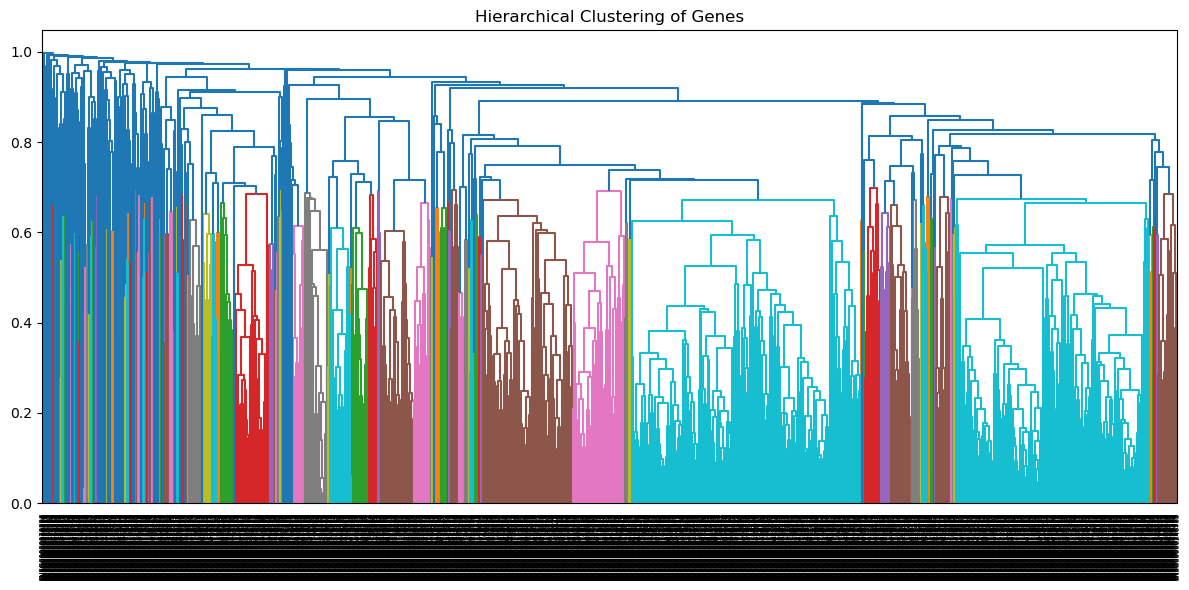

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=mean_expr_by_day.columns, leaf_rotation=90)
plt.title("Hierarchical Clustering of Genes")
plt.tight_layout()
plt.savefig("gene_clusters_dendrogram.png", dpi=150)
plt.show()


### Visualisation of trends

Notice, we z-score each gene

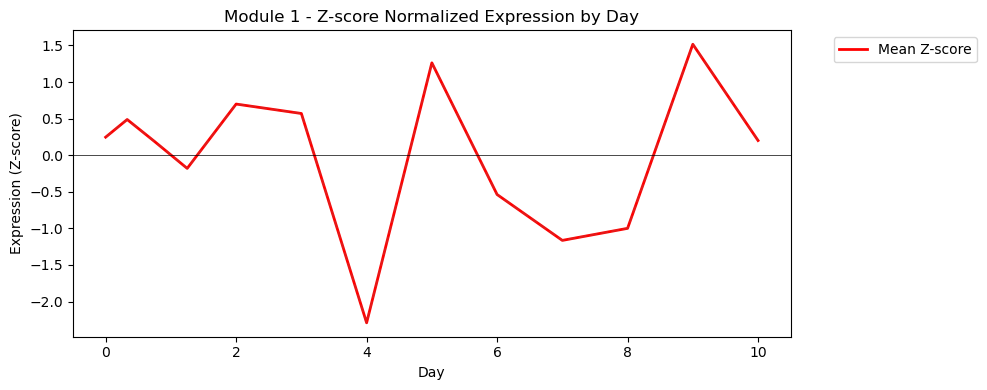

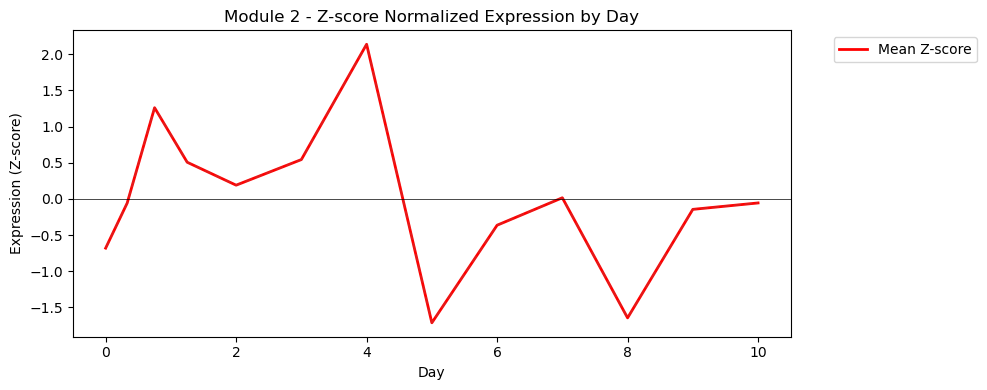

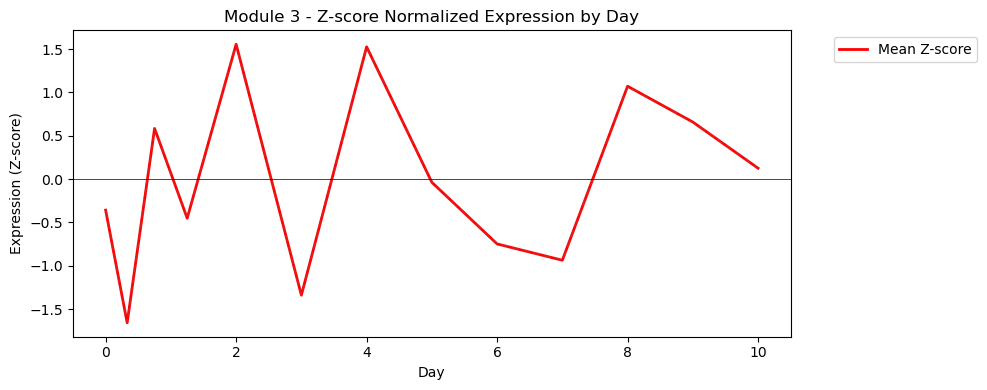

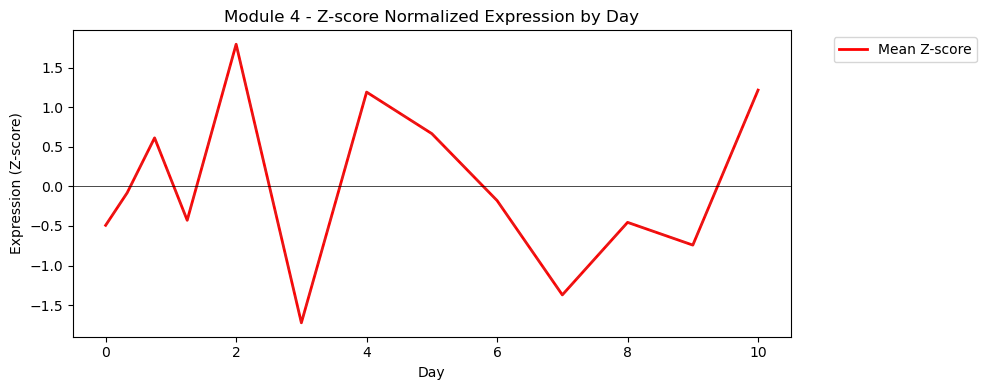

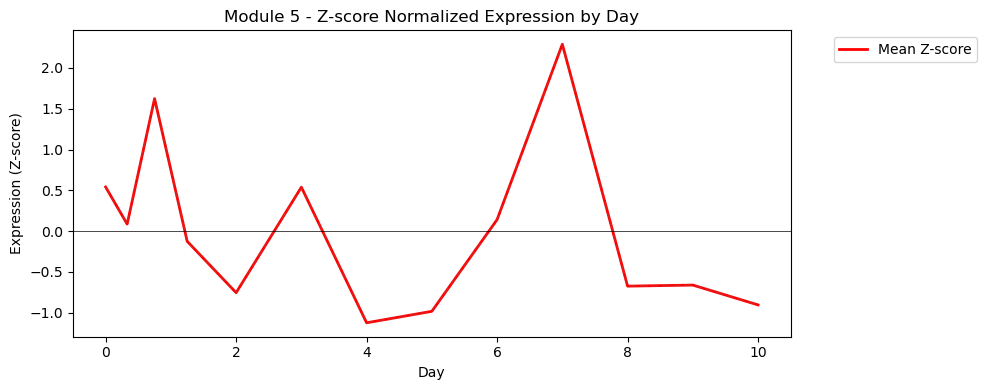

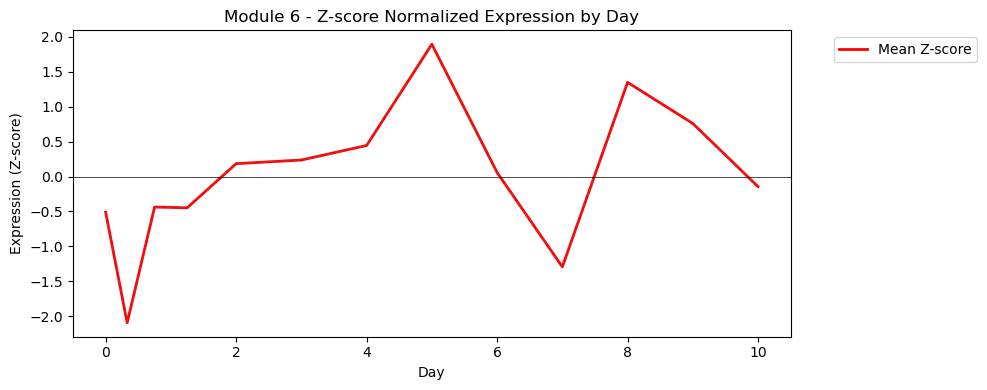

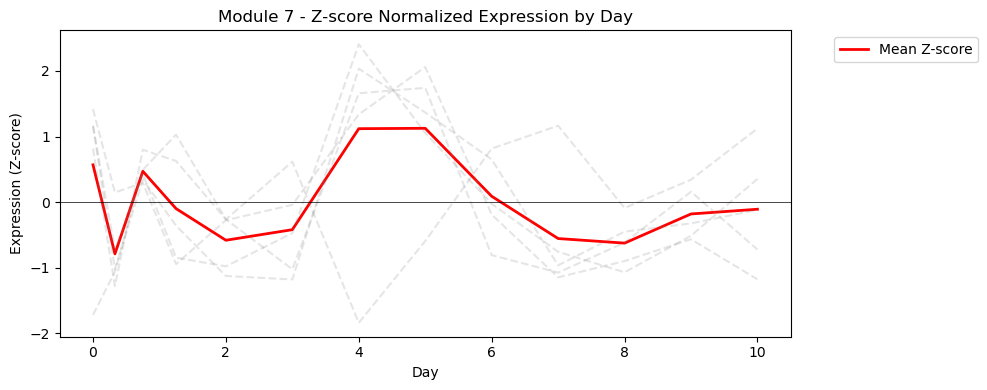

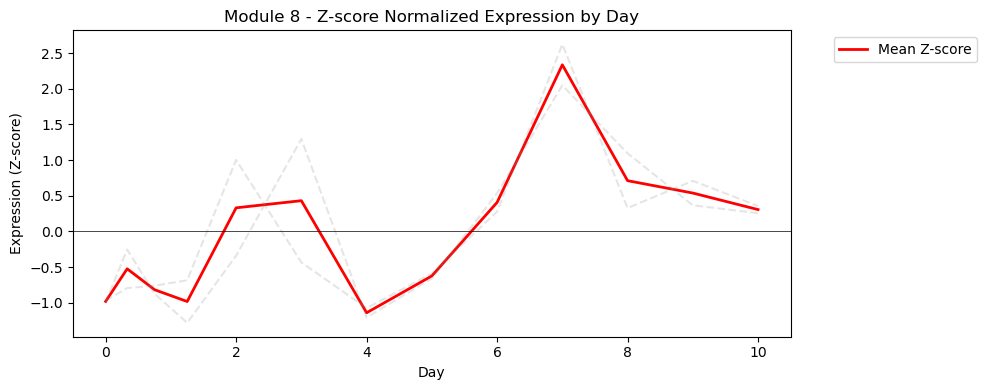

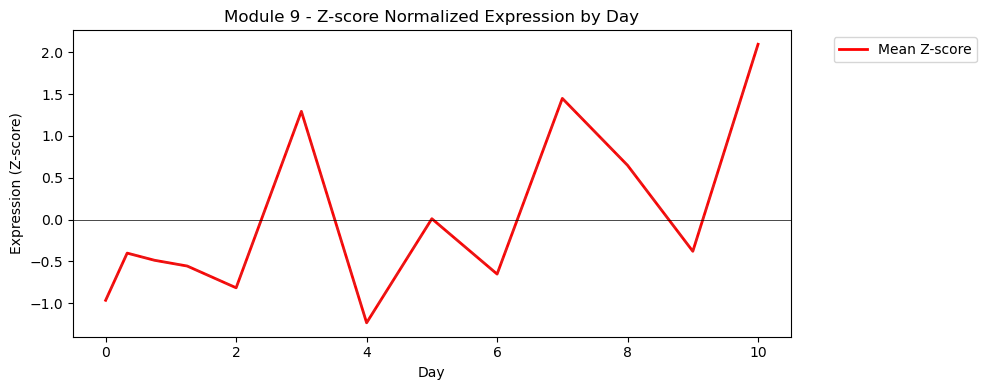

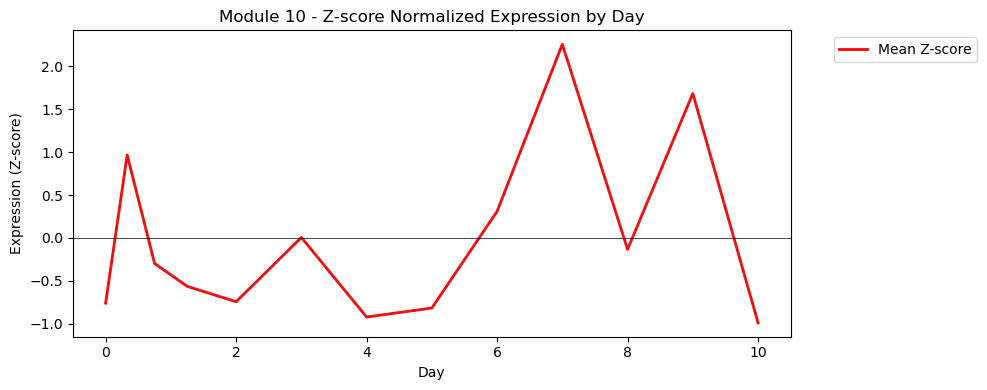

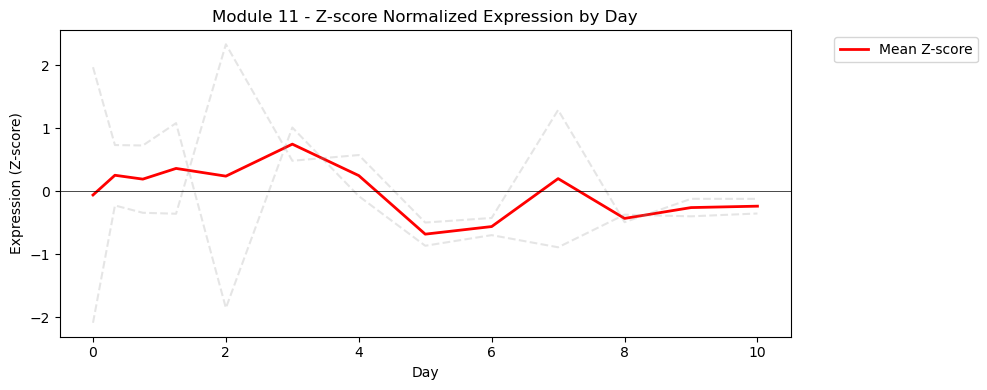

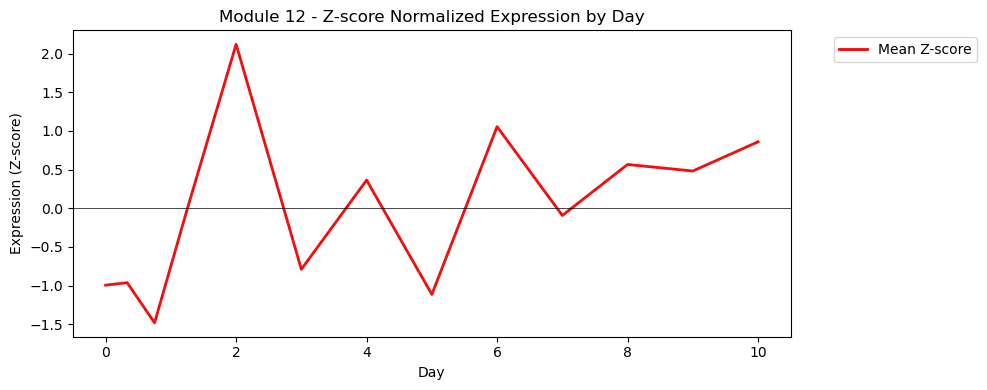

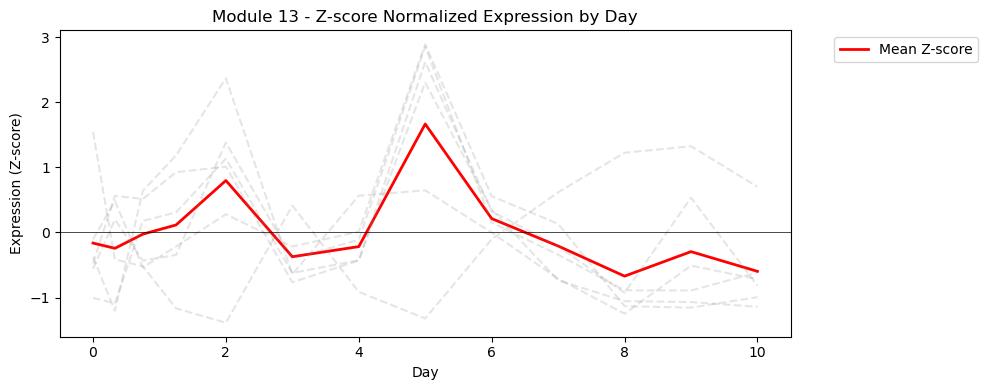

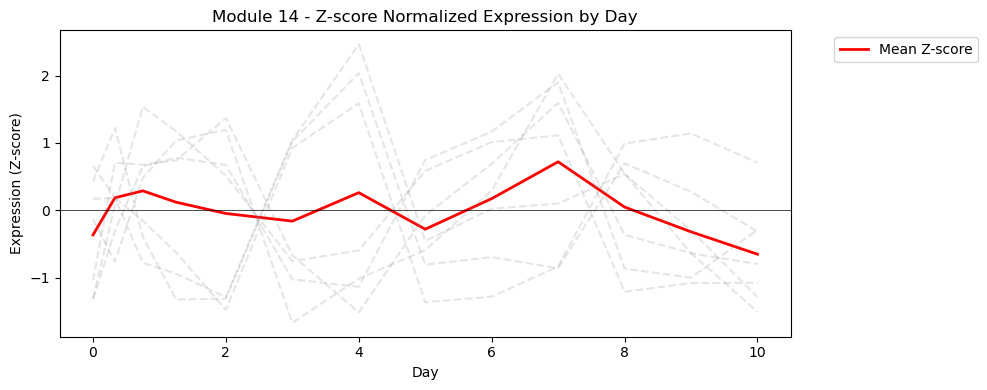

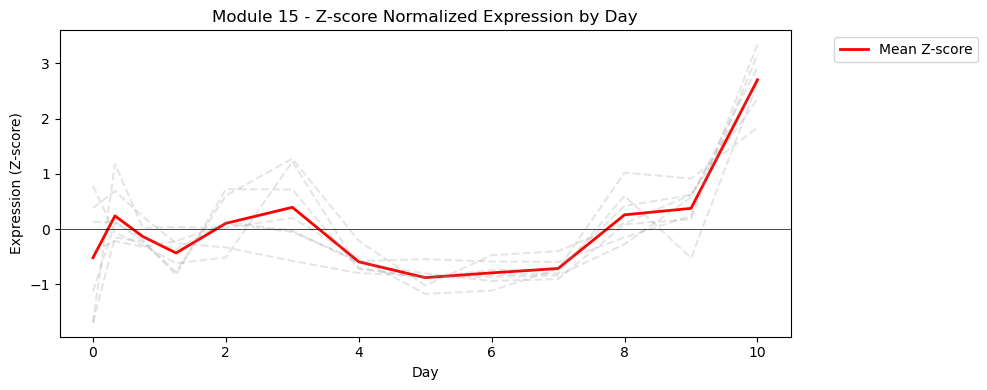

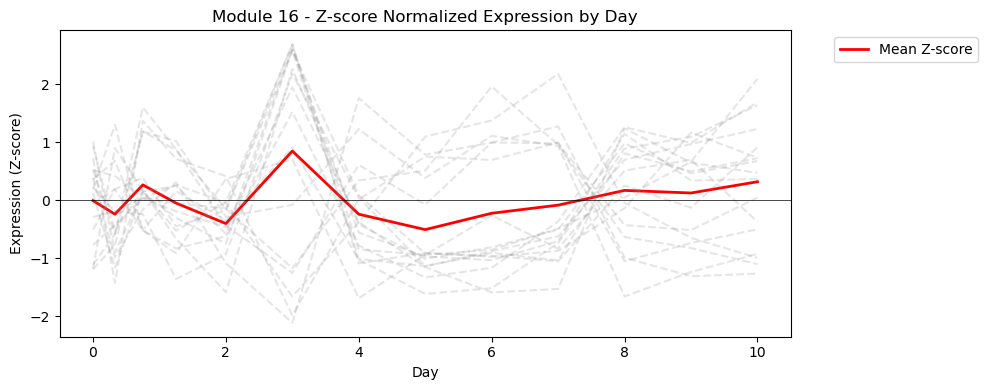

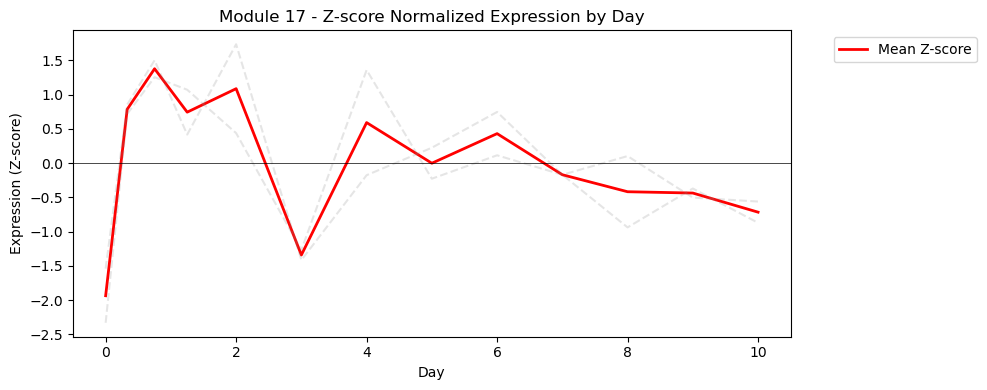

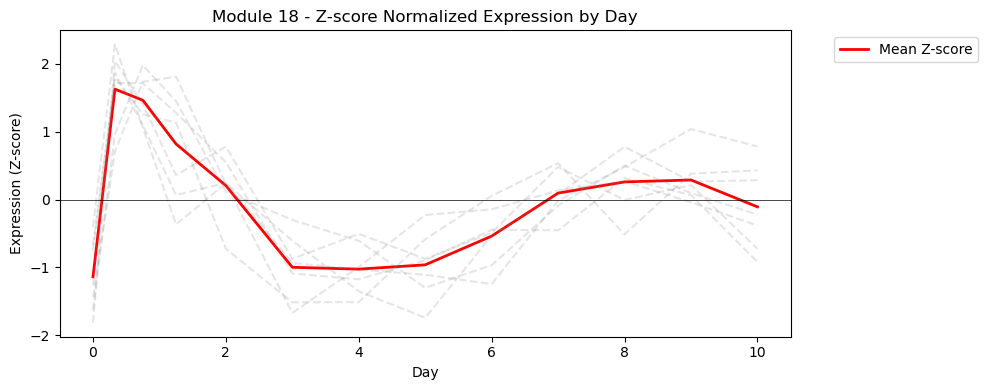

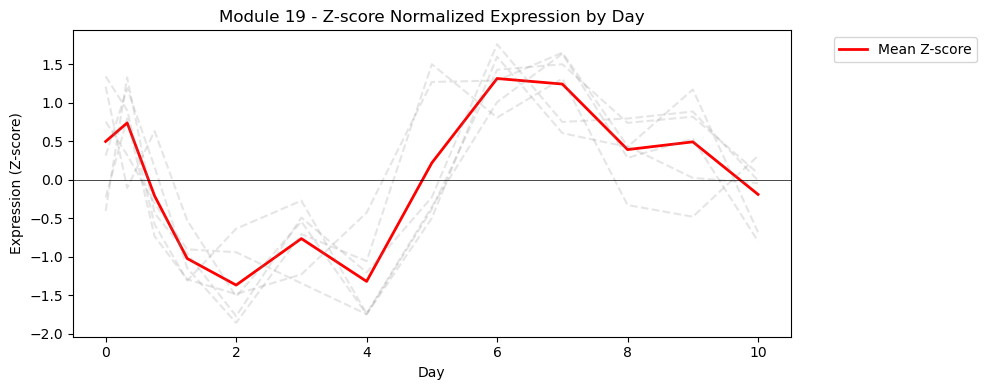

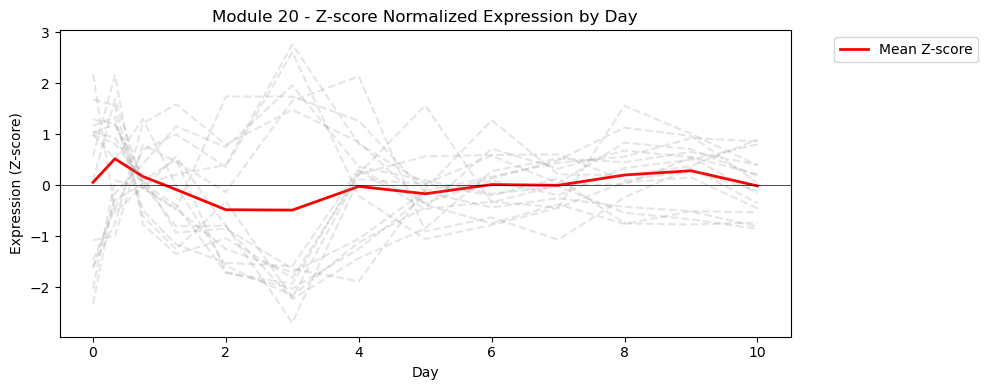

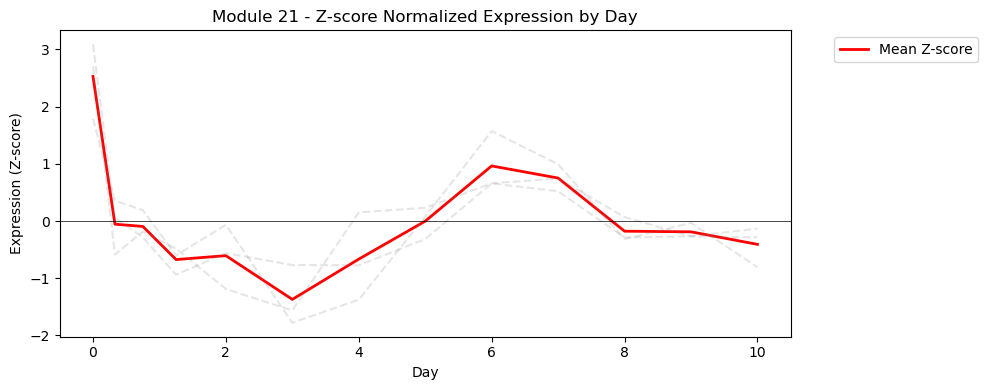

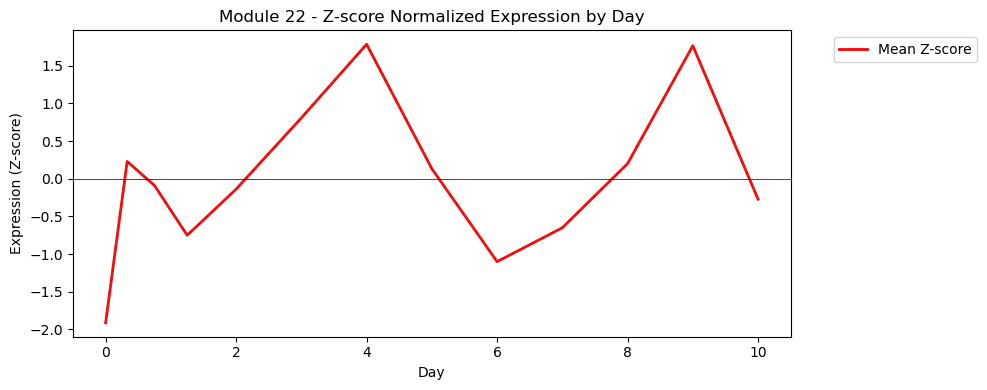

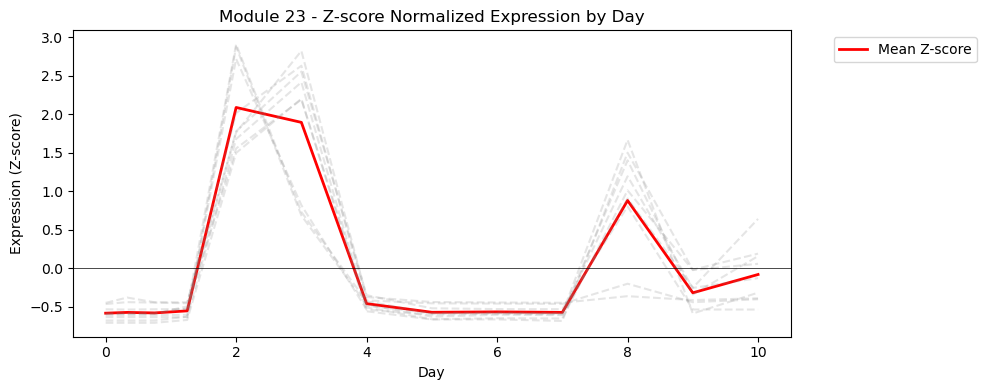

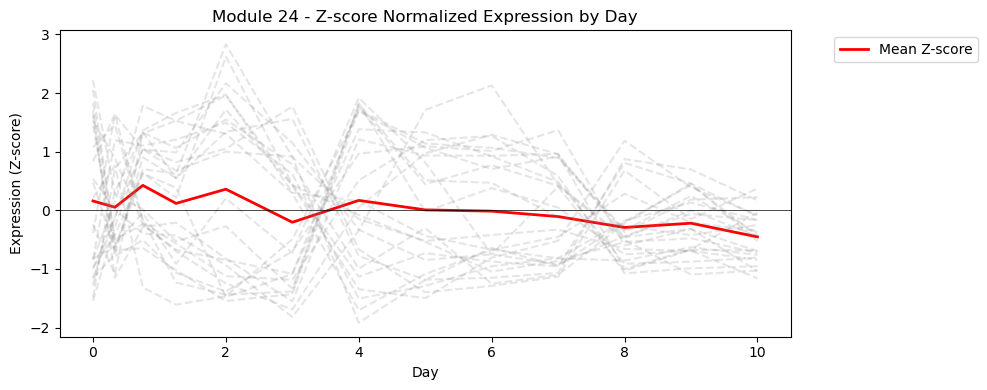

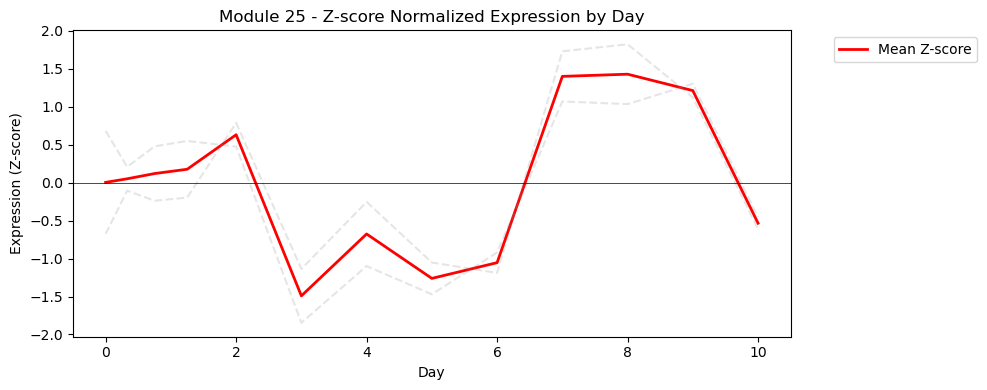

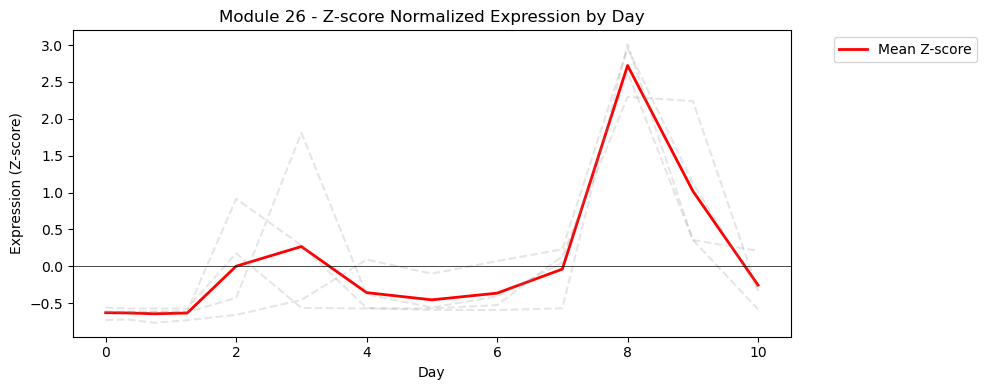

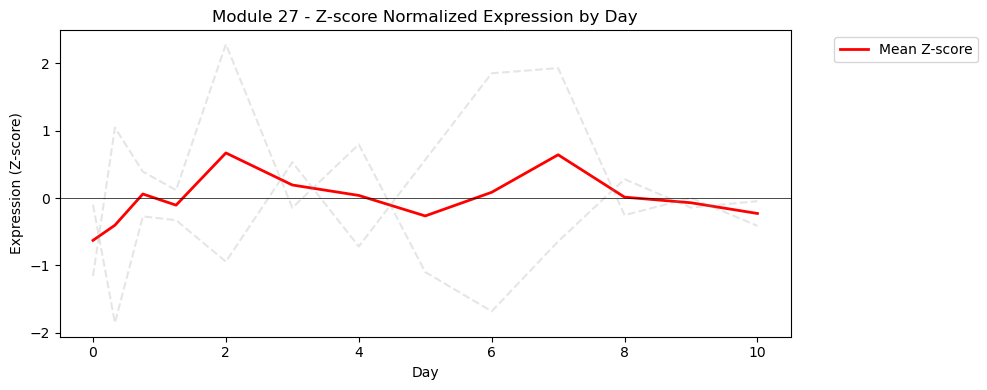

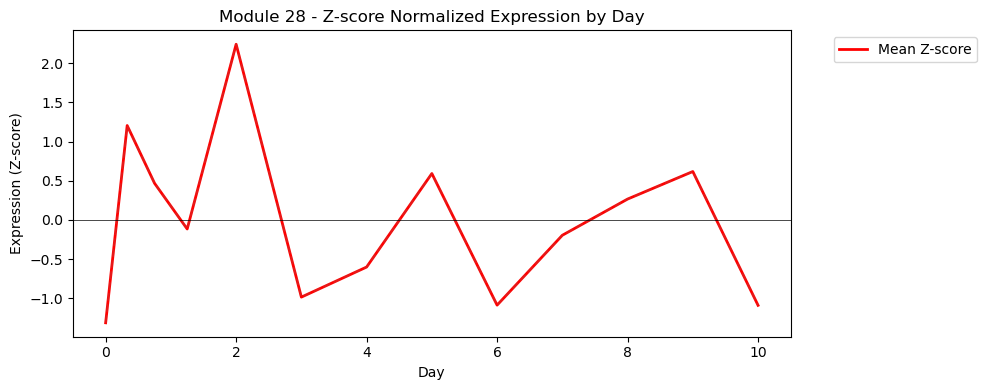

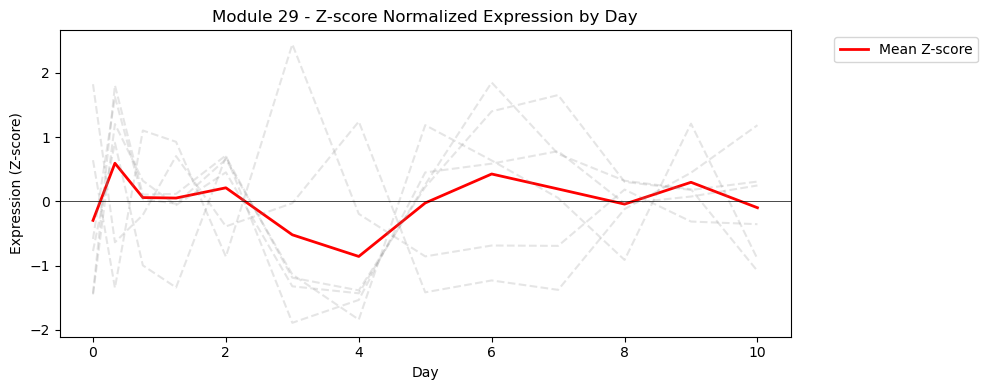

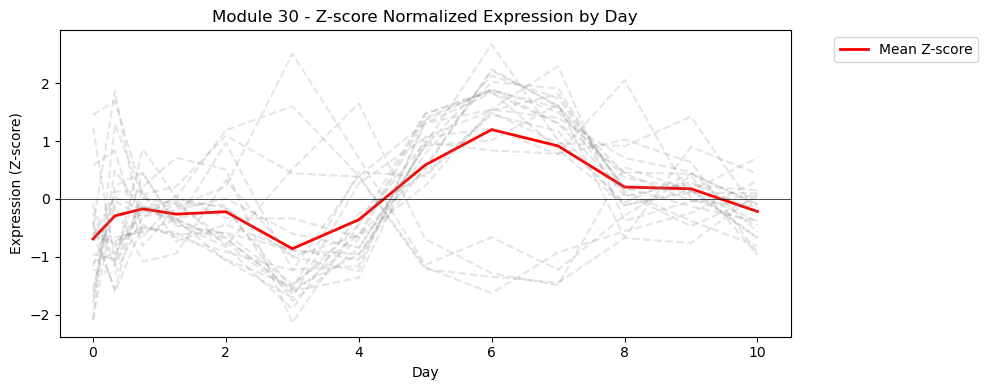

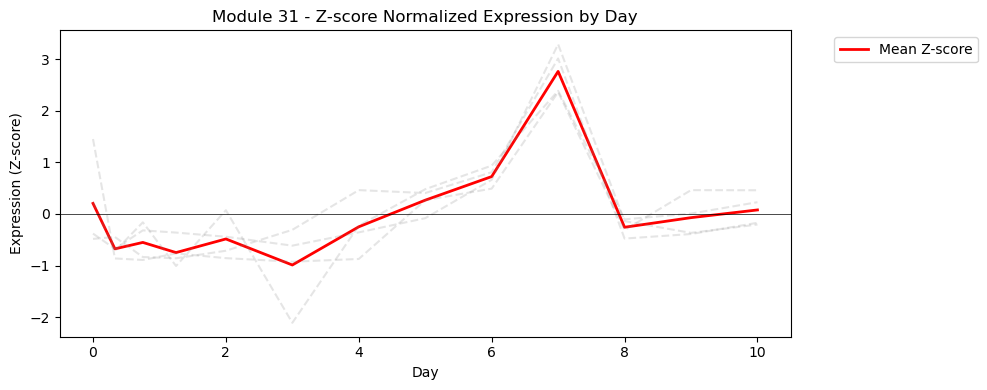

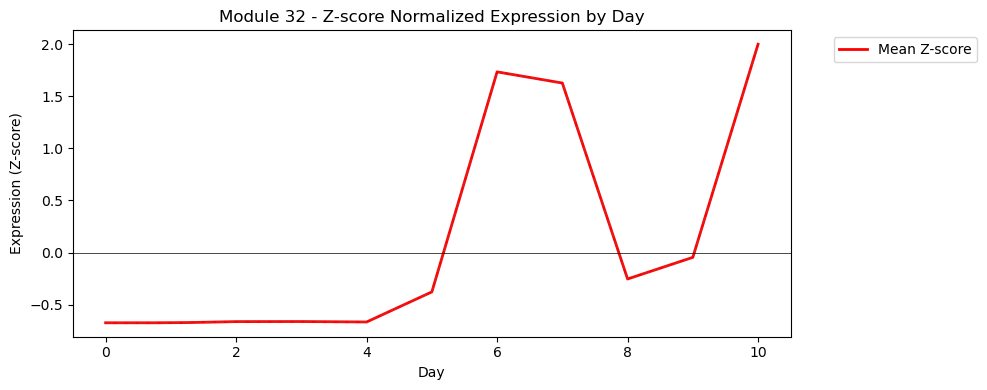

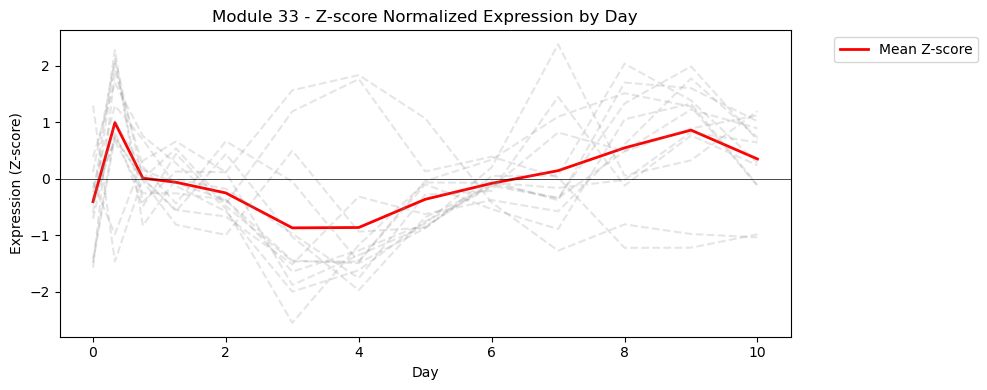

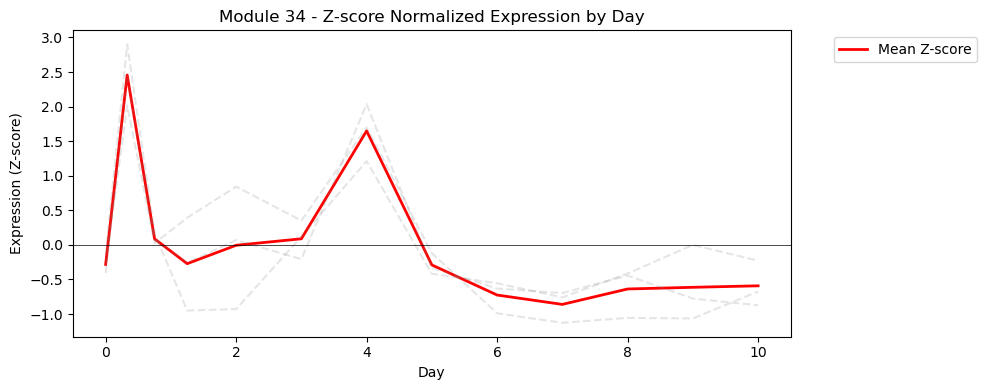

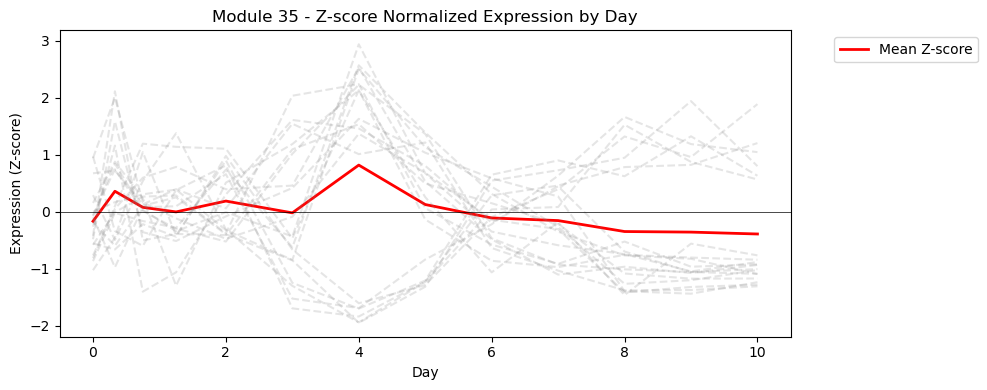

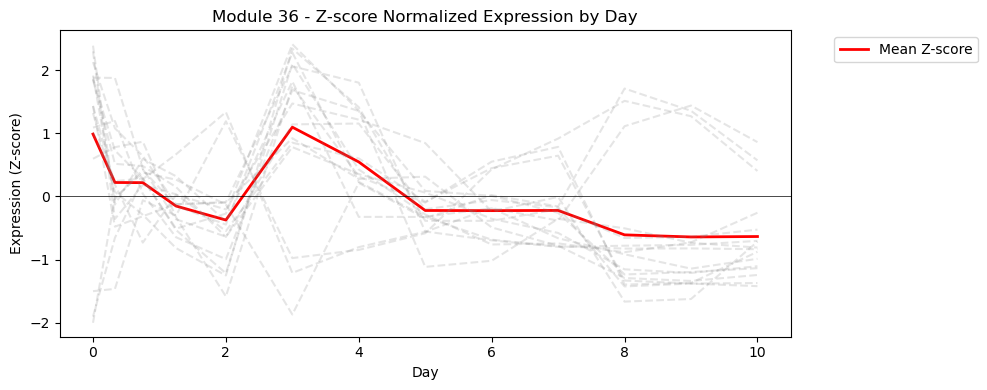

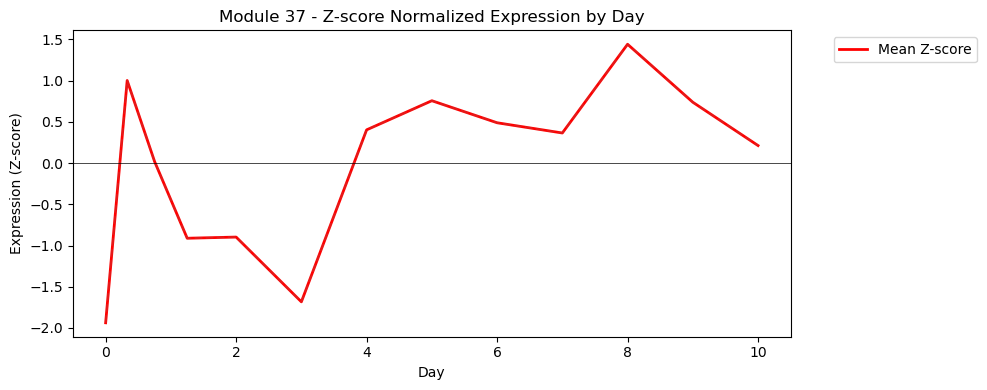

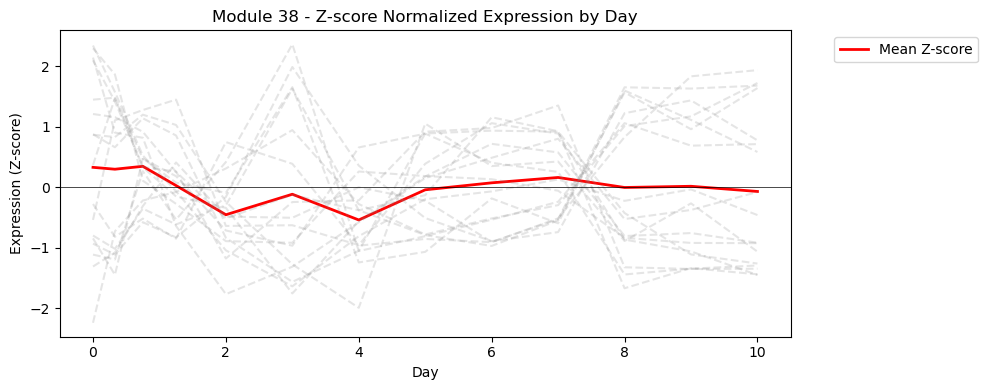

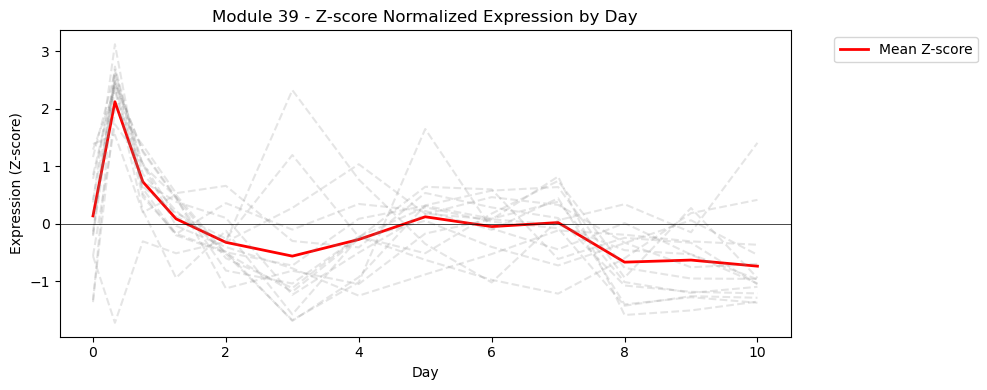

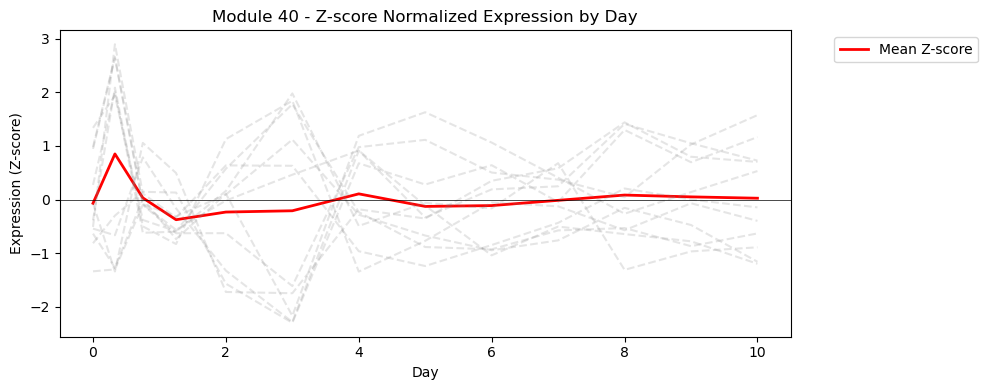

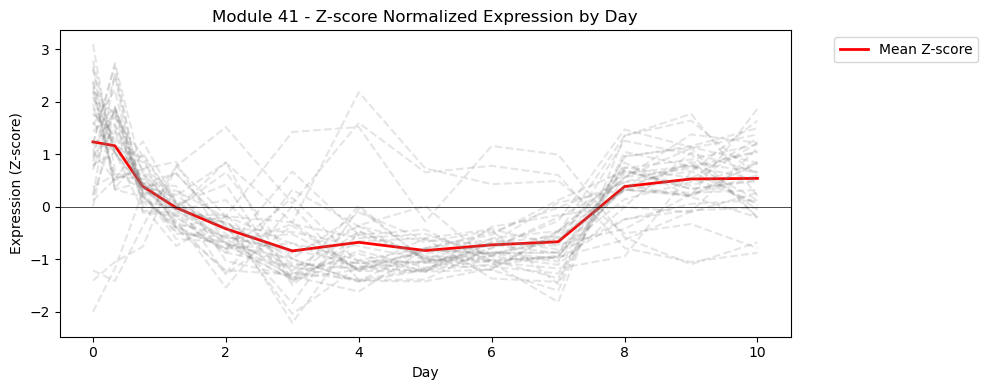

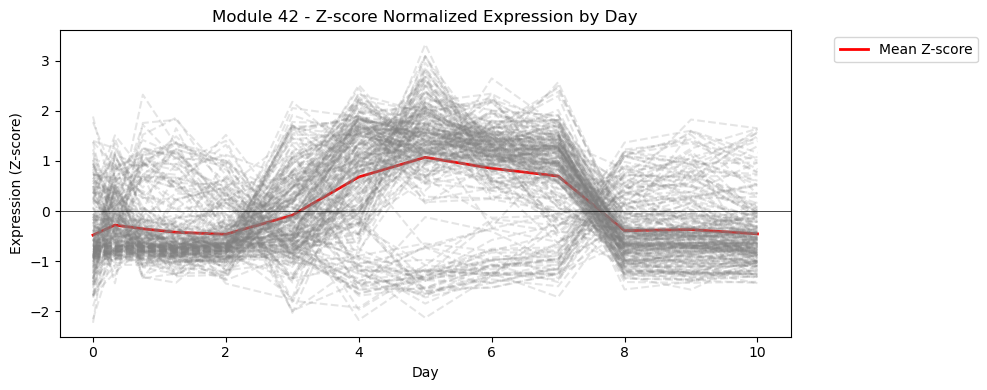

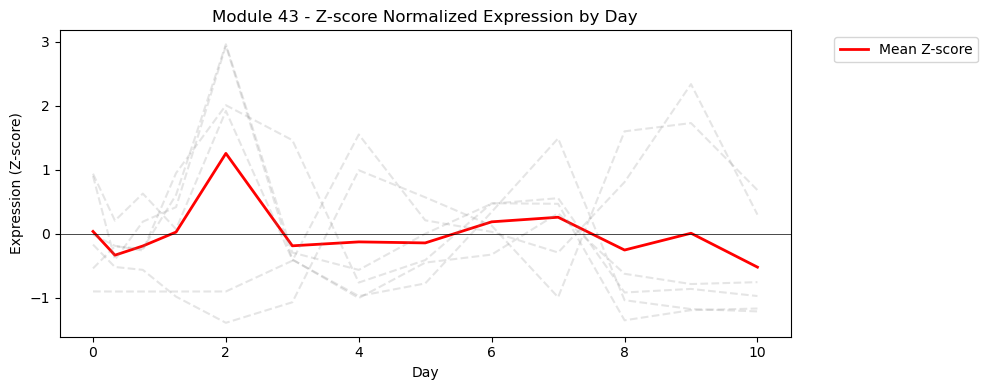

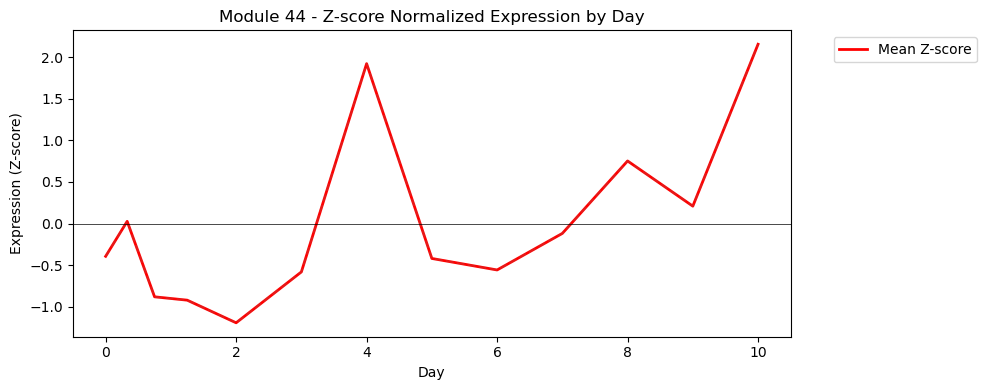

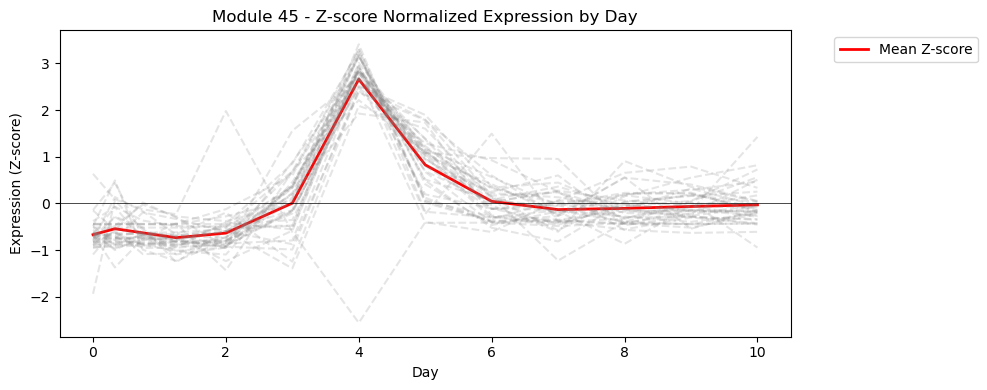

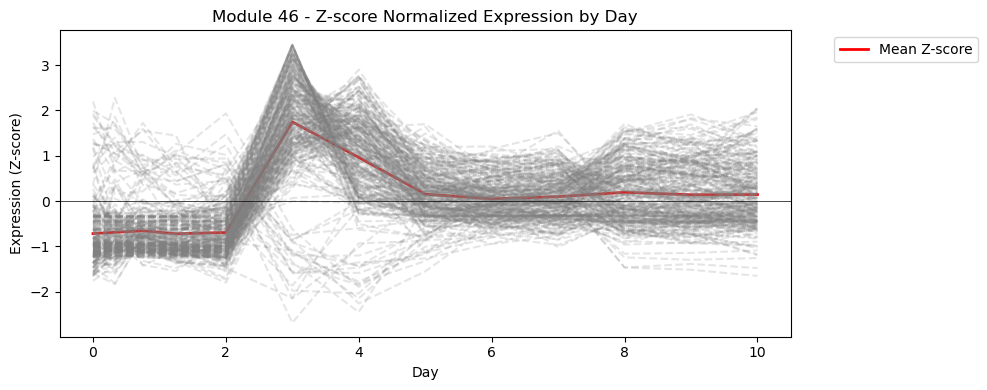

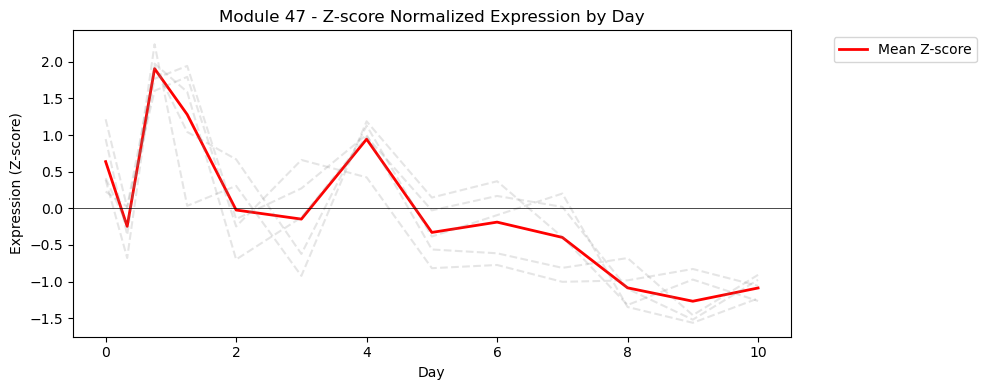

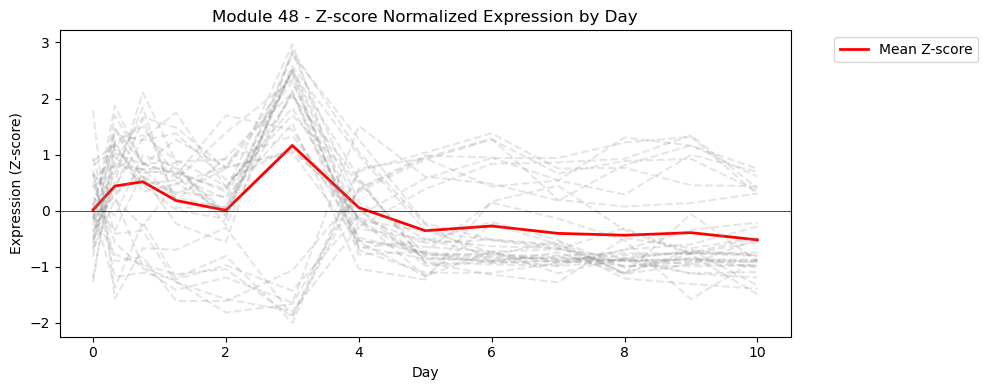

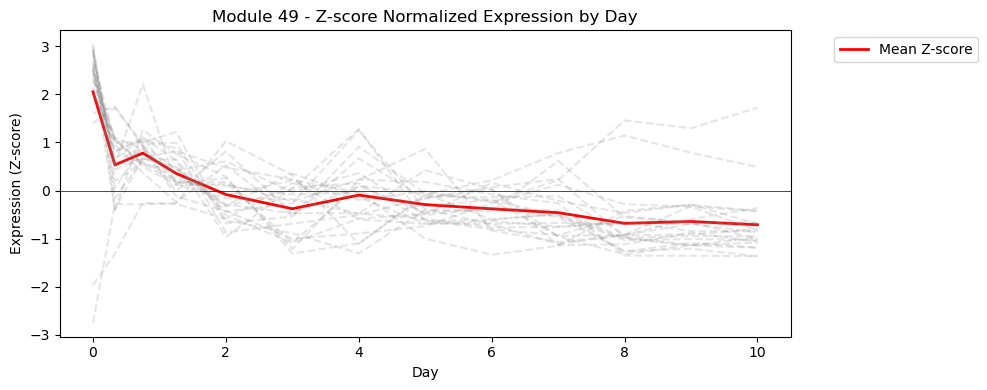

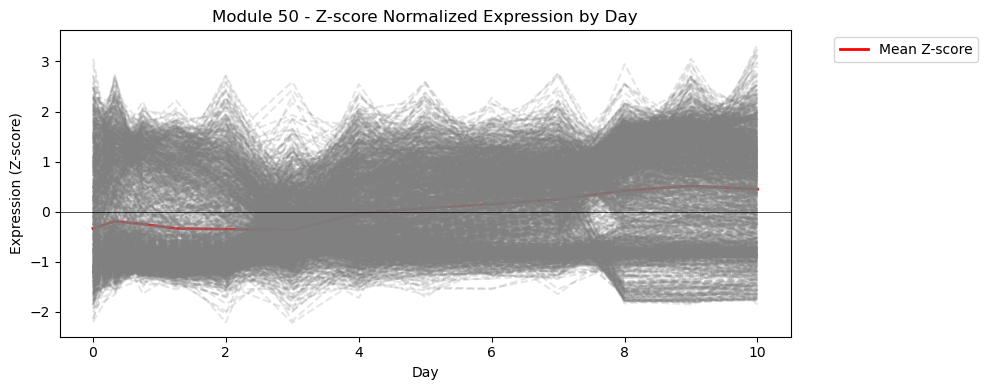

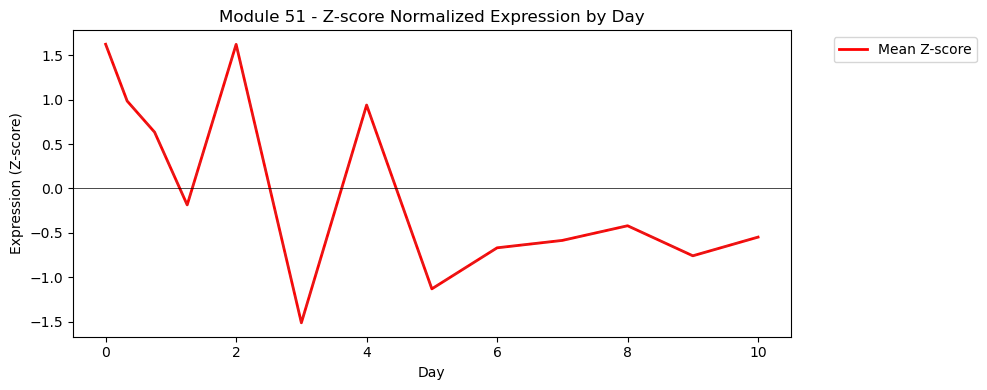

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

for mod in module_df["module"].unique():
    genes_in_module = module_df[module_df["module"] == mod]["gene"]
    module_expr = mean_expr_by_day[genes_in_module]

    # Z-score for each gene
    module_expr_z = module_expr.apply(zscore, axis=0)  # axis=0

    plt.figure(figsize=(10, 4))

    # Mean line for all genes in module
    mean_expression_z = module_expr_z.mean(axis=1)
    plt.plot(module_expr_z.index, mean_expression_z,
             color='red', linewidth=2, label='Mean Z-score')

    # Separate genes (grey lines)
    for gene in module_expr_z.columns:
        plt.plot(module_expr_z.index, module_expr_z[gene],
                 alpha=0.2, color='grey', linestyle='--')

    plt.title(f"Module {mod} - Z-score Normalized Expression by Day")
    plt.xlabel("Day")
    plt.ylabel("Expression (Z-score)")
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)  # zero line
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(f"./wgcna_plot/module_{mod}.png")
    plt.show()

### Eigengene matrix


In [ ]:
expr_df = counts

from sklearn.decomposition import PCA

expr_T = expr_df.T

expr_T = expr_T.loc[:, expr_T.columns.isin(module_df["gene"])]

module_eigengenes = {}

for mod in module_df["module"].unique():
    genes_in_module = module_df[module_df["module"] == mod]["gene"]
    module_expr = expr_T[genes_in_module]  # samples x genes

    pca = PCA(n_components=1)
    eigengene = pca.fit_transform(module_expr)[:, 0]  # First PC (eigengene)

    module_eigengenes[f"Module_{mod}"] = eigengene


eigengenes_df = pd.DataFrame(module_eigengenes, index=expr_T.index)
eigengenes_df.to_csv("module_eigengenes.csv")

Group by Day

In [ ]:
eigengenes_df = pd.read_csv("/content/module_eigengenes.csv", index_col=0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
meta = pd.read_csv("/content/drive/MyDrive/Embryo/embryo_meta_human.csv", index_col=0)

In [ ]:
df_means = eigengenes_df
df_means["Day"] = meta["day"]

In [ ]:
df_means

Module_1  Module_2  Module_3  Module_4  Module_5  \
ERX3015937_ERX3015937 -0.145237 -0.187909  1.015722 -0.084161 -0.054255   
ERX3015939_ERX3015939 -0.145237 -0.187909 -0.130391  0.175689 -0.054255   
ERX3015940_ERX3015940 -0.145237  0.984401 -0.130391  1.047502 -0.054255   
ERX3015941_ERX3015941 -0.105800  0.451324  0.789282  0.346941 -0.054255   
ERX3015936_ERX3015936 -0.145237  0.604667 -0.116101  0.062388 -0.054255   
...                         ...       ...       ...       ...       ...   
SRX300884_SRX300884    0.122171  0.133784  0.017424  0.162032 -0.028297   
SRX300876_SRX300876    0.016199 -0.108983 -0.069046 -0.115842 -0.029621   
SRX300882_SRX300882    0.002592 -0.069639 -0.123489 -0.214140 -0.054255   
SRX300886_SRX300886    0.065298 -0.026405 -0.130391 -0.275292 -0.054255   
SRX300877_SRX300877    0.052004  0.011222 -0.062860  0.087808 -0.007022   

                       Module_6  Module_7  Module_8  Module_9  Module_10  ...  \
ERX3015937_ERX3015937 -0.218558  0.734738 -0.053670 -0.130948  -0.042429  ...   
ERX3015939_ERX3015939  0.279711  0.405786 -0.053670 -0.130948  -0.042429  ...   
ERX3015940_ERX3015940 -0.218558  1.409105 -0.053670 -0.130948  -0.042429  ...   
ERX3015941_ERX3015941  0.349191  1.325766  0.344644  0.347423  -0.042429  ...   
ERX3015936_ERX3015936  0.896949  0.718435 -0.053670 -0.130948  -0.042429  ...   
...                         ...       ...       ...       ...        ...  ...   
SRX300884_SRX300884   -0.019574 -0.193308 -0.044723 -0.118256  -0.042429  ...   
SRX300876_SRX300876   -0.109182 -0.255537 -0.026182 -0.127305  -0.023747  ...   
SRX300882_SRX300882   -0.164626 -0.037852 -0.052931 -0.130083  -0.007546  ...   
SRX300886_SRX300886   -0.218558 -0.146833  0.021153 -0.130948  -0.042429  ...   
SRX300877_SRX300877   -0.153182 -0.089590 -0.028953 -0.038611   0.048507  ...   

                       Module_43  Module_44  Module_45  Module_46  Module_47  \
ERX3015937_ERX3015937  -1.294020  -0.258636   0.498144  -0.956773   0.247232   
ERX3015939_ERX3015939  -0.750276  -0.258636   1.214616   0.868395   0.355816   
ERX3015940_ERX3015940  -1.302812  -0.258636   0.916140   0.762115  -0.092259   
ERX3015941_ERX3015941  -1.167361  -0.258636   0.739700   1.283941   0.413525   
ERX3015936_ERX3015936  -0.548852  -0.258636  -0.803870  -0.232060   0.234185   
...                          ...        ...        ...        ...        ...   
SRX300884_SRX300884     0.614776  -0.186185  -1.496056  -6.515446   0.155274   
SRX300876_SRX300876     0.034898  -0.023863  -1.353552  -6.923884  -0.329452   
SRX300882_SRX300882    -0.234119  -0.012712  -1.802809  -6.849169   0.104061   
SRX300886_SRX300886    -0.137715  -0.257685  -1.847812  -7.272603  -0.635238   
SRX300877_SRX300877    -0.138124  -0.049490  -1.366862  -6.185348   0.346847   

                       Module_48  Module_49  Module_50  Module_51   Day  
ERX3015937_ERX3015937   0.117420   0.268789  -4.514519  -0.286295  5.00  
ERX3015939_ERX3015939   1.050971   0.538381  -1.904741  -0.286295  5.00  
ERX3015940_ERX3015940   0.138001   0.908744  -3.856670   0.994921  5.00  
ERX3015941_ERX3015941   0.219031   0.458103  -2.109351   0.179532  5.00  
ERX3015936_ERX3015936   0.061598   0.483499  -1.995144   0.463005  5.00  
...                          ...        ...        ...        ...   ...  
SRX300884_SRX300884     1.411310   0.396860  -9.451401   0.165463  2.00  
SRX300876_SRX300876     1.688325   0.845585 -11.264877   0.185111  0.33  
SRX300882_SRX300882     0.734296   1.840985 -12.604223   0.089606  1.25  
SRX300886_SRX300886    -0.179444   0.651972 -11.797817   0.269874  2.00  
SRX300877_SRX300877     1.890166   1.322103  -8.867436   0.084138  0.33  

[2323 rows x 52 columns]

In [ ]:
df_means.groupby('Day').mean()

Module_1  Module_2  Module_3  Module_4  Module_5  Module_6  Module_7  \
Day                                                                           
0.00   0.026578 -0.026507 -0.001890 -0.017977  0.004988 -0.032820  0.241180   
0.33   0.036929  0.011872 -0.068369  0.009062 -0.003792 -0.109948 -0.181332   
0.75   0.024026  0.093115  0.046329  0.054726  0.025943 -0.029233  0.018989   
1.25   0.008272  0.046661 -0.006650 -0.013772 -0.007878 -0.029757 -0.170510   
2.00   0.045989  0.027126  0.096008  0.132573 -0.020056  0.001029 -0.226255   
3.00   0.040456  0.048939 -0.052075 -0.099038  0.004952  0.003562 -0.238023   
4.00  -0.082254  0.147182  0.094502  0.092788 -0.027189  0.013700  0.373718   
5.00   0.070157 -0.090120  0.014529  0.058224 -0.024468  0.084294  0.300075   
6.00  -0.007049 -0.006987 -0.021821  0.002592 -0.002737 -0.005101  0.011905   
7.00  -0.033945  0.016391 -0.031450 -0.075831  0.038829 -0.070956 -0.285584   
8.00  -0.026878 -0.085929  0.071243 -0.015535 -0.018501  0.057720 -0.175383   
9.00   0.081045  0.006518  0.050109 -0.034424 -0.018248  0.029061 -0.134823   
10.00  0.024605  0.011989  0.022868  0.094443 -0.022951 -0.015024 -0.160129   

       Module_8  Module_9  Module_10  ...  Module_42  Module_43  Module_44  \
Day                                   ...                                    
0.00  -0.038584 -0.082885  -0.031591  ...  -5.885465   0.073790  -0.055981   
0.33  -0.024750 -0.042329   0.014522  ...  -5.700064   0.009075   0.009084   
0.75  -0.034790 -0.048498  -0.019234  ...  -6.950309   0.027606  -0.131391   
1.25  -0.040935 -0.053438  -0.026354  ...  -6.995309   0.274546  -0.137622   
2.00  -0.010628 -0.072150  -0.031143  ...  -6.891468   0.607684  -0.179743   
3.00   0.004247  0.079522  -0.011141  ...  -2.121859   0.321714  -0.085033   
4.00  -0.043064 -0.102233  -0.035906  ...   2.077909  -0.278548   0.302578   
5.00  -0.029722 -0.012779  -0.033109  ...   1.682611  -0.136139  -0.059994   
6.00  -0.002273 -0.060347  -0.003002  ...   0.660707   0.063659  -0.081407   
7.00   0.043273  0.090659   0.048993  ...   0.546634   0.183364  -0.013356   
8.00   0.007483  0.033112  -0.014852  ...  -7.450578  -0.394338   0.121482   
9.00  -0.001366 -0.040755   0.033663  ...  -7.623264  -0.413172   0.037388   
10.00 -0.006272  0.137211  -0.037703  ...  -7.553588  -0.292556   0.338716   

       Module_45  Module_46  Module_47  Module_48  Module_49  Module_50  \
Day                                                                       
0.00   -1.547972  -6.558516   0.389866   0.515101   2.939663  -9.049203   
0.33   -1.276816  -6.482151   0.004405   1.823334   1.191575 -10.267989   
0.75   -1.465674  -6.113730   0.865406   1.808628   1.057055  -8.244699   
1.25   -1.566219  -6.459479   0.810278   1.665774   0.677673 -10.035382   
2.00   -1.469955  -6.230652   0.001497   1.232240   0.254145  -9.884287   
3.00   -0.296150   6.681011   0.199344   3.343760   0.268528  -6.637393   
4.00    2.840316   4.049105   0.471442   0.810371   0.637648  -5.755891   
5.00    0.611595  -0.349572  -0.042385  -0.192789   0.125587  -2.022735   
6.00   -0.595983  -1.081166  -0.010485  -0.334867  -0.014434  -0.473112   
7.00   -0.560615  -0.674794  -0.091050  -0.337253  -0.203859   1.053811   
8.00   -0.517814  -0.297233  -0.256250  -0.444222  -0.681379  14.969151   
9.00   -0.556904  -0.837202  -0.392938  -0.503365  -0.670349  15.283655   
10.00  -0.502660  -0.599928  -0.275493  -0.362320  -0.694345  14.726008   

       Module_51  
Day               
0.00    0.243063  
0.33    0.172667  
0.75    0.134116  
1.25    0.043894  
2.00    0.242917  
3.00   -0.102271  
4.00    0.167682  
5.00   -0.060192  
6.00   -0.009311  
7.00   -0.000128  
8.00    0.018042  
9.00   -0.019206  
10.00   0.003962  

[13 rows x 51 columns]

Visualisation

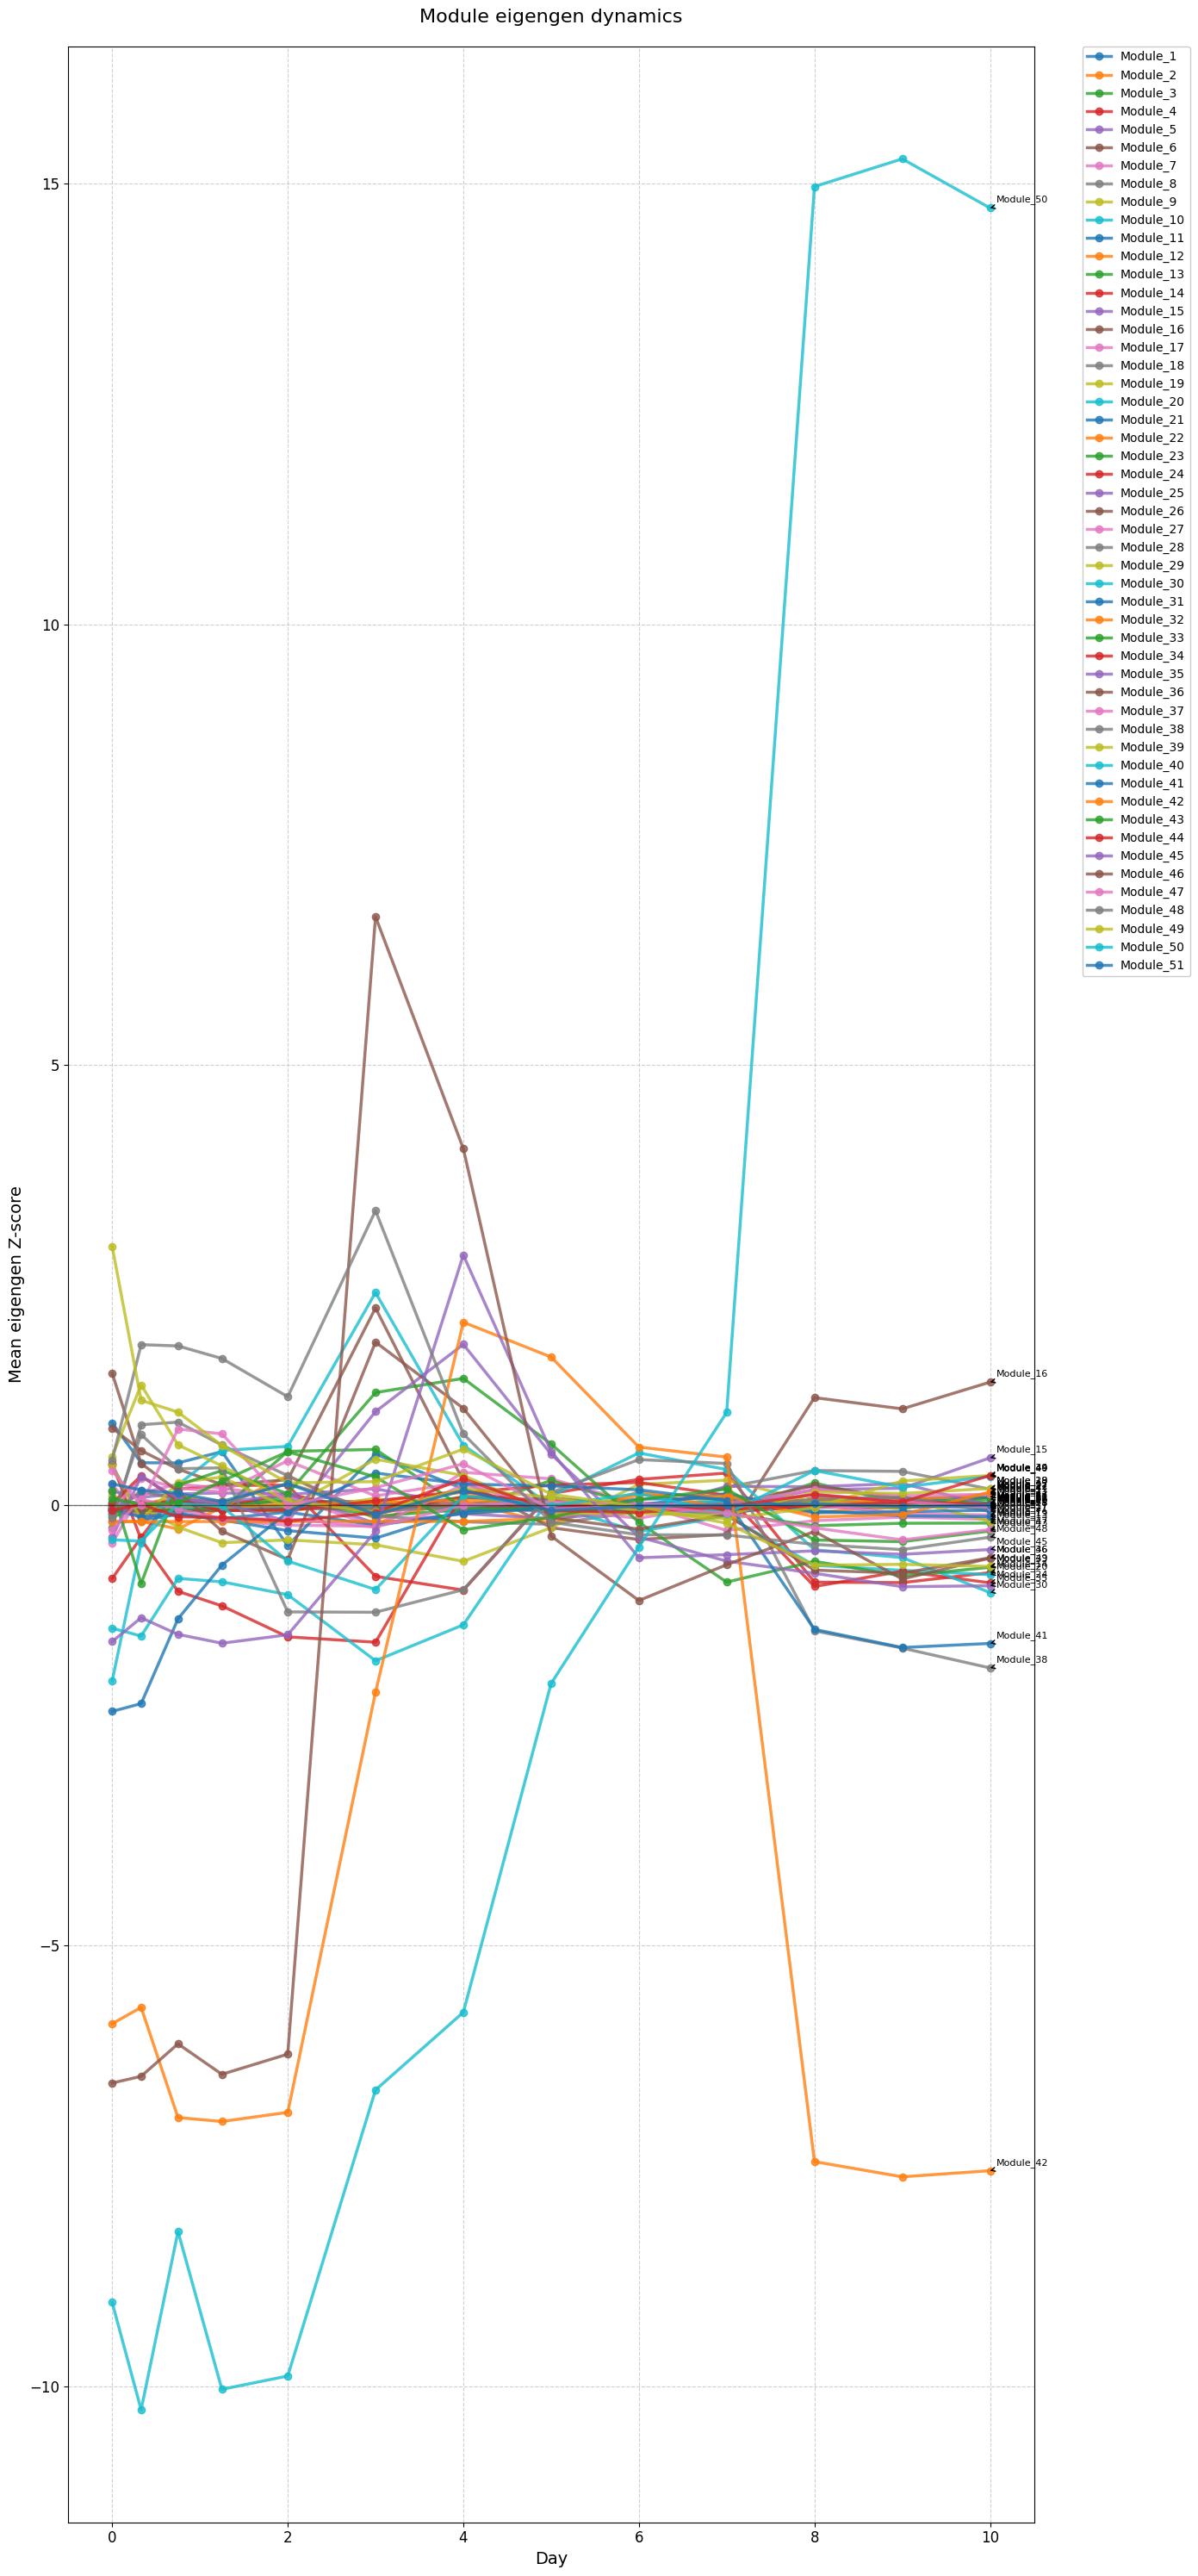

In [ ]:
daily_means = df_means.groupby('Day').mean()

plt.figure(figsize=(14, 30))

for i, module in enumerate(daily_means.columns):
    plt.plot(daily_means.index,
             daily_means[module],
             label=module,
             linewidth=2.5,
             alpha=0.8,
             marker='o',
             markersize=6)

    y_last = daily_means[module].iloc[-1]
    x_last = daily_means.index[-1]
    plt.annotate(f'{module}',
                 xy=(x_last, y_last),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=8,
                 arrowprops=dict(arrowstyle='->', color='black'))


plt.title('Module eigengen dynamics',
          fontsize=16, pad=20)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Module eigengen (mean by day)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.,
           fontsize=10,
           framealpha=1)

plt.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

plt.tight_layout()

plt.show()

Great! Thats it

### Now just visualizing the same result for Ageing df (it's for my comfort, **you can ignore what happens further**)

In [ ]:
meta = pd.read_csv("/content/drive/MyDrive/Ageing/metadata.csv", index_col=0)
counts = pd.read_csv("/content/drive/MyDrive/Ageing/vst_normalized_counts.csv", index_col=0)
module_df = pd.read_csv("/content/genes_by_module (1).csv", index_col=0)

In [ ]:
module_df

module
gene                   
ENSG00000026297       1
ENSG00000122884       2
ENSG00000168228       3
ENSG00000060138       4
ENSG00000254726       5
...                 ...
ENSG00000080802      50
ENSG00000005249      50
ENSG00000186591      50
ENSG00000107341      50
ENSG00000082996      51

[2494 rows x 1 columns]

In [ ]:
genes = pd.read_csv("/content/drive/MyDrive/Ageing/All_genes.csv", index_col=0)
module_df_mice = pd.merge(module_df, genes, left_index=True, right_index=True, how='inner')
module_df = module_df_mice

In [ ]:
module_df

module        ENSEMBL_mice
ENSG00000122884       2  ENSMUSG00000019916
ENSG00000168228       3  ENSMUSG00000029179
ENSG00000060138       4  ENSMUSG00000030189
ENSG00000254726       5  ENSMUSG00000074480
ENSG00000203995       6  ENSMUSG00000034645
...                 ...                 ...
ENSG00000080802      50  ENSMUSG00000038784
ENSG00000005249      50  ENSMUSG00000002997
ENSG00000186591      50  ENSMUSG00000039159
ENSG00000107341      50  ENSMUSG00000036241
ENSG00000082996      51  ENSMUSG00000036503

[2330 rows x 2 columns]

In [ ]:
expr_df = counts

from sklearn.decomposition import PCA

expr_T = expr_df.T

expr_T = expr_T.loc[:, expr_T.columns.isin(module_df["ENSEMBL_mice"])]

module_eigengenes = {}

for mod in module_df["module"].unique():
    genes_in_module = module_df[module_df["module"] == mod]["ENSEMBL_mice"]
    matched_genes = genes_in_module[genes_in_module.isin(expr_T.columns)]
    module_expr = expr_T[matched_genes]

    pca = PCA(n_components=1)
    eigengene = pca.fit_transform(module_expr)[:, 0]

    module_eigengenes[f"Module_{mod}"] = eigengene


eigengenes_df = pd.DataFrame(module_eigengenes, index=expr_T.index)

In [ ]:
df_means = eigengenes_df
df_means["Day"] = meta["Day"]

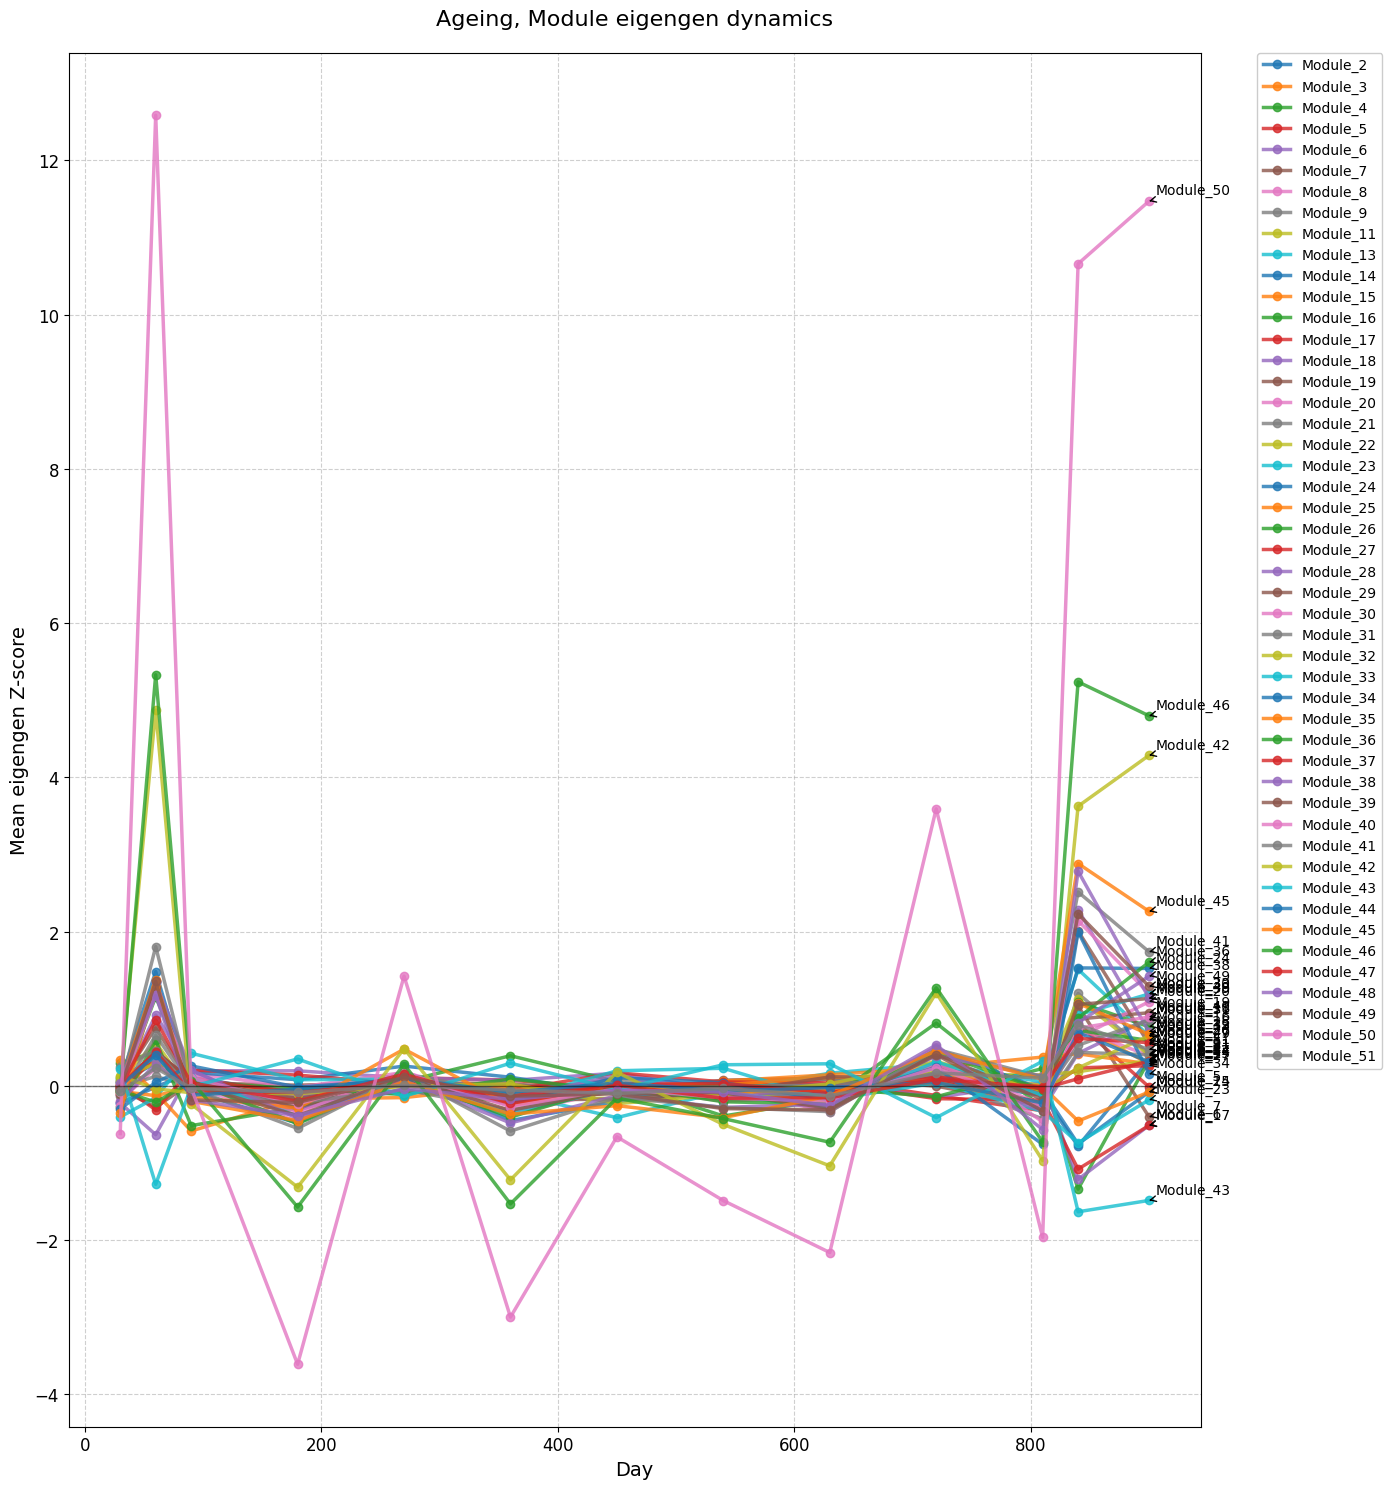

In [ ]:
daily_means = df_means.groupby('Day').mean()

plt.figure(figsize=(14, 15))

for i, module in enumerate(daily_means.columns):
    plt.plot(daily_means.index,
             daily_means[module],
             label=module,
             linewidth=2.5,
             alpha=0.8,
             marker='o',
             markersize=6)

    y_last = daily_means[module].iloc[-1]
    x_last = daily_means.index[-1]
    plt.annotate(f'{module}',
                 xy=(x_last, y_last),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=10,
                 arrowprops=dict(arrowstyle='->', color='black'))


plt.title('Ageing, Module eigengen dynamics',
          fontsize=16, pad=20)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Module eigengen (mean by day)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.,
           fontsize=10,
           framealpha=1)

plt.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

plt.tight_layout()

plt.show()

### For SC PyWGCNA would be more usefull actually

In [ ]:
!pip install PyWGCNA

In [ ]:
import PyWGCNA
from PyWGCNA  import WGCNA


In [ ]:
import pandas as pd

# Load normalized counts
counts = pd.read_csv('vst_normalized_counts.csv', index_col=0)

# Filter for significant genes
sig_gene_counts = counts.loc[counts.index.isin(sig_genes["gene"])]

# Transpose to have samples as rows and genes as columns
expression_data = sig_gene_counts.T

# Ensure that the sample names match between expression_data and meta
expression_data = expression_data.loc[meta.index]


# Initialize WGCNA object

wgcna = WGCNA()


# Load expression data
wgcna.load_expression_data(expression_data)

# Choose a soft-thresholding power; you may need to determine this empirically
soft_power = 6

# Construct the network
wgcna.construct_network(power=soft_power)

# Detect modules
wgcna.detect_modules()
# Compute module eigengenes
wgcna.compute_module_eigengenes()

# Access the module eigengenes DataFrame
eigengenes_df = wgcna.module_eigengenes

# Add 'Day' information to eigengenes_df
eigengenes_df['Day'] = meta['Day'].values

# Analyze correlation between module eigengenes and 'Day'
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = eigengenes_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Module Eigengenes and Day')
plt.show()

# Save module assignments
module_assignments = wgcna.module_assignments
module_assignments.to_csv('module_assignments.csv')

# Save module eigengenes
eigengenes_df.to_csv('module_eigengenes.csv')

TypeError: WGCNA.__init__() got an unexpected keyword argument 'data_matrix'

In [ ]:
module_df = pd.read_csv("/content/genes_by_module (1).csv", index_col=0)

In [ ]:
mod_genes = module_df.reset_index()
mod_genes = mod_genes.rename(columns={"gene":"ENSEMBL"})
mod_genes

ENSEMBL  module
0     ENSG00000026297       1
1     ENSG00000122884       2
2     ENSG00000168228       3
3     ENSG00000060138       4
4     ENSG00000254726       5
...               ...     ...
2489  ENSG00000080802      50
2490  ENSG00000005249      50
2491  ENSG00000186591      50
2492  ENSG00000107341      50
2493  ENSG00000082996      51

[2494 rows x 2 columns]

In [ ]:
prot = pd.read_csv('/content/proteostasis_signatures.csv', index_col=0)
auto = pd.read_csv('/content/autophagy_signatures.csv', index_col=0)
genom = pd.read_csv('/content/genomic_signatures_new.csv', index_col=0)
sen = pd.read_csv('/content/senescence_data.csv', index_col=0)


In [ ]:
auto = auto.rename(columns = {"Process" : "Subprocess"})


In [ ]:
def get_hallmark_genes(module_df, hallmark_df, number_of_module):
    # Filter module_df for the specified module
    filtered_module = module_df[module_df['module'] == number_of_module]

    # Get the list of gene names from the ENSEMBL column in the filtered module_df
    gene_names = filtered_module['ENSEMBL'].tolist()

    # Filter hallmark_df where ENSEMBL column matches the gene names from module_df
    result_df = hallmark_df[hallmark_df['ENSEMBL'].isin(gene_names)]

    return result_df

In [ ]:
get_hallmark_genes(mod_genes, prot, 23)

ENSEMBL             Gene Synonyms  \
Gene                                                  
TRIM43    ENSG00000144015                   TRIM43A   
TRIM43B   ENSG00000144010              (none known)   
TRIM49    ENSG00000168930  RNF18, TRIM49A, TRIM49L2   
TRIM49B   ENSG00000182053                    RNF18B   
TRIM49C   ENSG00000204449                  TRIM49L2   
TRIM48    ENSG00000150244                    RNF101   
RFPL4A    ENSG00000223638             RFPL4, RNF210   
RFPL4AL1  ENSG00000229292                   RNF210B   
USP29     ENSG00000131864             HOM-TES-84/86   

                           Subprocess                         Class Group  \
Gene                                                                        
TRIM43    Ubiquitin Proteasome System  E3 ubiquitin and UBL ligases  RING   
TRIM43B   Ubiquitin Proteasome System  E3 ubiquitin and UBL ligases  RING   
TRIM49    Ubiquitin Proteasome System  E3 ubiquitin and UBL ligases  RING   
TRIM49B   Ubiquitin Proteasome System  E3 ubiquitin and UBL ligases  RING   
TRIM49C   Ubiquitin Proteasome System  E3 ubiquitin and UBL ligases  RING   
TRIM48    Ubiquitin Proteasome System  E3 ubiquitin and UBL ligases  RING   
RFPL4A    Ubiquitin Proteasome System  E3 ubiquitin and UBL ligases  RING   
RFPL4AL1  Ubiquitin Proteasome System  E3 ubiquitin and UBL ligases  RING   
USP29     Ubiquitin Proteasome System      DUBs and UBL demodifiers   USP   

              Hallmark  
Gene                    
TRIM43    Proteostasis  
TRIM43B   Proteostasis  
TRIM49    Proteostasis  
TRIM49B   Proteostasis  
TRIM49C   Proteostasis  
TRIM48    Proteostasis  
RFPL4A    Proteostasis  
RFPL4AL1  Proteostasis  
USP29     Proteostasis

In [ ]:
get_hallmark_genes(mod_genes, genom, 47)

Original_Subprocess             Hallmark                Subprocess  \
Gene                                                                          
BRCA2  DNA damage and repair  Genomic instability  Homologous Recombination   

           Specific_Subcategory   Regulation          ENSEMBL  \
Gene                                                            
BRCA2  Strand Exchange Mediator  Upregulated  ENSG00000139618   

             ENSEMBL_mice  
Gene                       
BRCA2  ENSMUSG00000041147

In [ ]:
get_hallmark_genes(mod_genes, prot, 47)

ENSEMBL                        Gene Synonyms  \
Gene                                                           
SEC62   ENSG00000008952             Dtrp1, HTP1, TLOC1, TP-1   
SEC62   ENSG00000008952             Dtrp1, HTP1, TLOC1, TP-1   
UBE2Q1  ENSG00000160714  GTAP, NICE-5, NICE5, PRO3094, UBE2Q   
USP16   ENSG00000156256                          UBP-M, UBPM   
UBE2Q1  ENSG00000160714  GTAP, NICE-5, NICE5, PRO3094, UBE2Q   
USP16   ENSG00000156256                          UBP-M, UBPM   
LATS2   ENSG00000150457                                  KPM   

                         Subprocess                          Class  \
Gene                                                                 
SEC62               ER proteostasis              Protein transport   
SEC62    Autophagy-Lysosome Pathway  Autophagy substrate selection   
UBE2Q1  Ubiquitin Proteasome System         E2 conjugating enzymes   
USP16   Ubiquitin Proteasome System       DUBs and UBL demodifiers   
UBE2Q1  Ubiquitin Proteasome System      Ubiquitin and UBL binding   
USP16   Ubiquitin Proteasome System      Ubiquitin and UBL binding   
LATS2   Ubiquitin Proteasome System      Ubiquitin and UBL binding   

                                  Group      Hallmark  
Gene                                                   
SEC62   SEC61 channel complex component  Proteostasis  
SEC62      Selective autophagy receptor  Proteostasis  
UBE2Q1                   ubiquitination  Proteostasis  
USP16                               USP  Proteostasis  
UBE2Q1            E2 conjugating enzyme  Proteostasis  
USP16                               DUB  Proteostasis  
LATS2      protein kinases & regulators  Proteostasis